In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# In this note book we will be looking at the Office Supplies category of the Superstore dataset.

In [3]:
df = pd.read_csv('Superstore.csv')

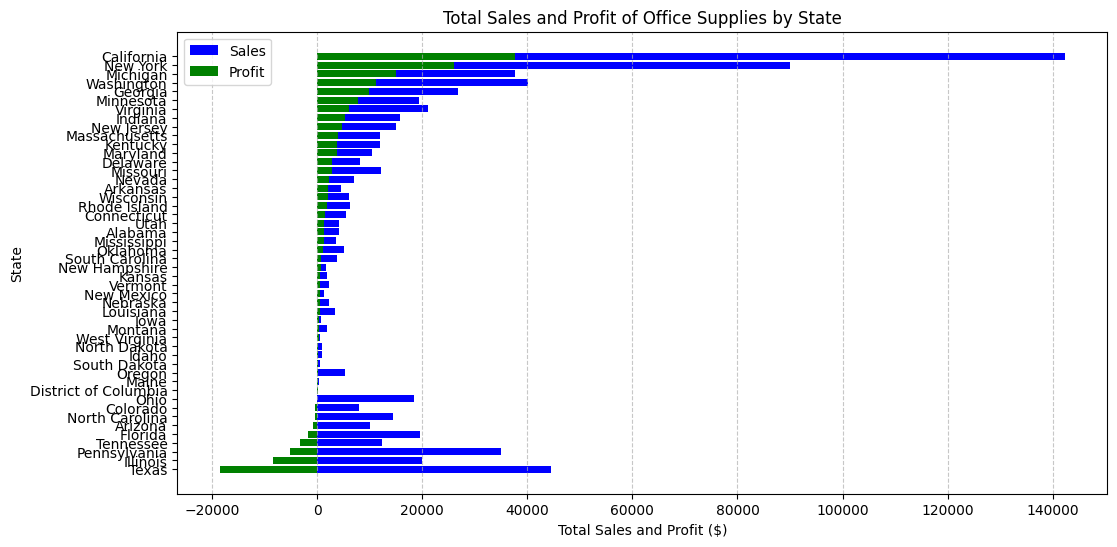

In [18]:
# First up, let's take an overall look at the performance of the Office Supplies category.

office_supplies = df[df["Category"] == "Office Supplies"]

# Group by State, then sum the Sales and Profit
office_supplies_sales_profit = office_supplies.groupby(["State"])[["Sales", "Profit"]].sum().reset_index()

# Sort by Profit (ascending)
office_supplies_sales_profit = office_supplies_sales_profit.sort_values(by='Profit')

# Plot total sales and profit by state
plt.figure(figsize=(12, 6))
plt.barh(office_supplies_sales_profit["State"], office_supplies_sales_profit["Sales"], color='blue', label='Sales')
plt.barh(office_supplies_sales_profit["State"], office_supplies_sales_profit["Profit"], color='green', label='Profit')

# Formatting
plt.xlabel("Total Sales and Profit ($)")
plt.ylabel("State")
plt.title("Total Sales and Profit of Office Supplies by State")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

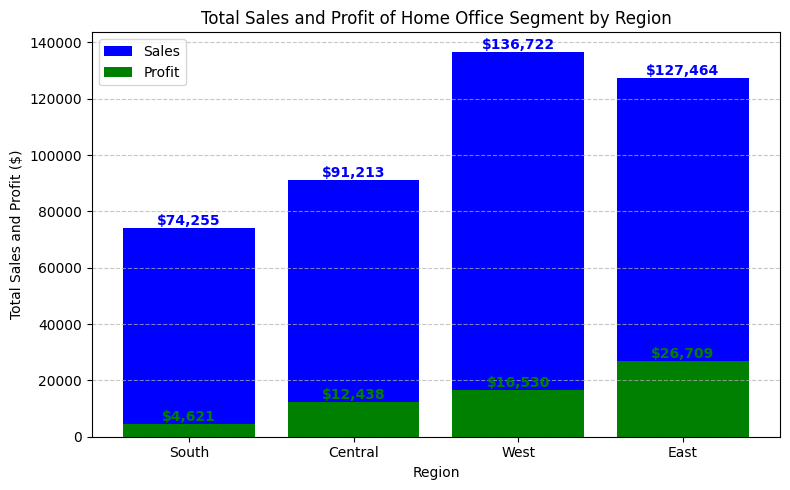

In [15]:
# Now let's take a look by region.

# Filter for Home Office category
home_office = df[df["Segment"] == "Home Office"]

# Group by Region to get Sales and Profit
home_office_sales_profit_by_region = home_office.groupby("Region")[["Sales", "Profit"]].sum().reset_index()

# Sort by Profit (ascending)
home_office_sales_profit_by_region = home_office_sales_profit_by_region.sort_values(by='Profit')

# Plot total sales and profit by region
plt.figure(figsize=(8, 5))
bars1 = plt.bar(home_office_sales_profit_by_region["Region"], home_office_sales_profit_by_region["Sales"], 
                color='blue', label='Sales')
bars2 = plt.bar(home_office_sales_profit_by_region["Region"], home_office_sales_profit_by_region["Profit"],
                color='green', label='Profit')

# Add labels on Sales bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", 
             ha='center', va='bottom', fontsize=10, color="blue", fontweight="bold")

# Add labels on Profit bars
for bar in bars2:
    height = bar.get_height()
    if height >= 0:
        va_position = 'bottom'
        offset = 5
    else:
        va_position = 'top'
        offset = -5

    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"${height:,.0f}", 
             ha='center', va=va_position, fontsize=10, color="green", fontweight="bold")

plt.ylabel("Total Sales and Profit ($)")
plt.xlabel("Region")
plt.title("Total Sales and Profit of Home Office Segment by Region")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# No losses in any region.
# It's mostly profitable on a state level, but there are a few states where the category is not doing well, le'ts take a closer look at the sub categories.

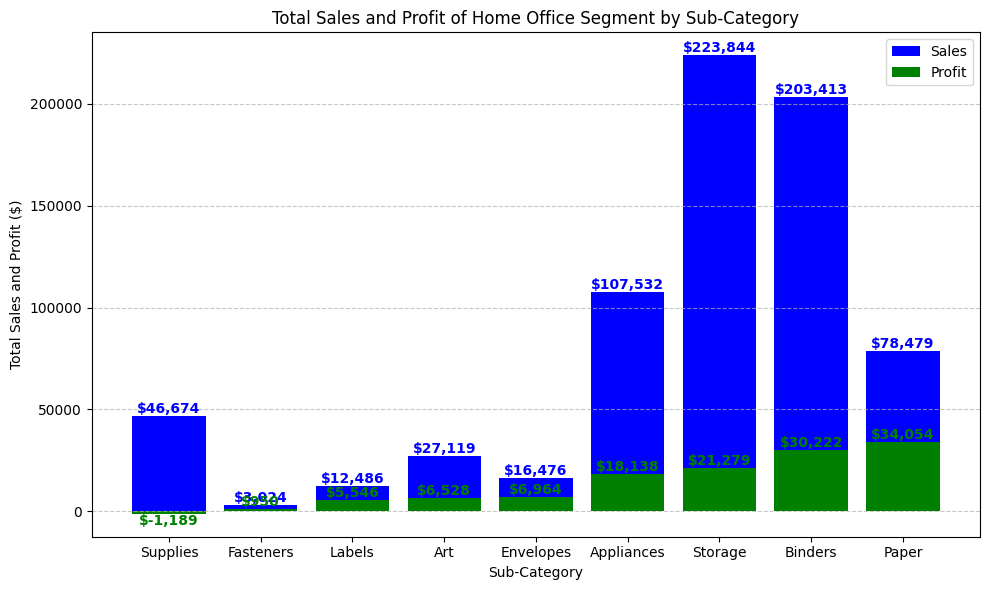

In [19]:


# Group by Sub-Category to get Sales and Profit
office_supplies_subcategory_sales_profits = office_supplies.groupby(["Sub-Category"])[["Sales", "Profit"]].sum().reset_index()

# Sort by Profit (ascending)
office_supplies_subcategory_sales_profits = office_supplies_subcategory_sales_profits.sort_values(by='Profit')

# Plot total sales and profit by sub-category
plt.figure(figsize=(10, 6))

# Bar chart for Sales
bars1 = plt.bar(office_supplies_subcategory_sales_profits["Sub-Category"], 
                office_supplies_subcategory_sales_profits["Sales"], 
                color='blue', label='Sales')

# Bar chart for Profit
bars2 = plt.bar(office_supplies_subcategory_sales_profits["Sub-Category"], 
                office_supplies_subcategory_sales_profits["Profit"], 
                color='green', label='Profit')

# Add labels on Sales bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", 
             ha='center', va='bottom', fontsize=10, color="blue", fontweight="bold")

# Add labels on Profit bars with adjustments for negative values
for bar in bars2:
    height = bar.get_height()
    if height >= 0:
        va_position = 'bottom'
        offset = 5
    else:
        va_position = 'top'
        offset = -5

    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"${height:,.0f}", 
             ha='center', va=va_position, fontsize=10, color="green", fontweight="bold")

# Formatting
plt.ylabel("Total Sales and Profit ($)")
plt.xlabel("Sub-Category")
plt.title("Total Sales and Profit of Home Office Segment by Sub-Category")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

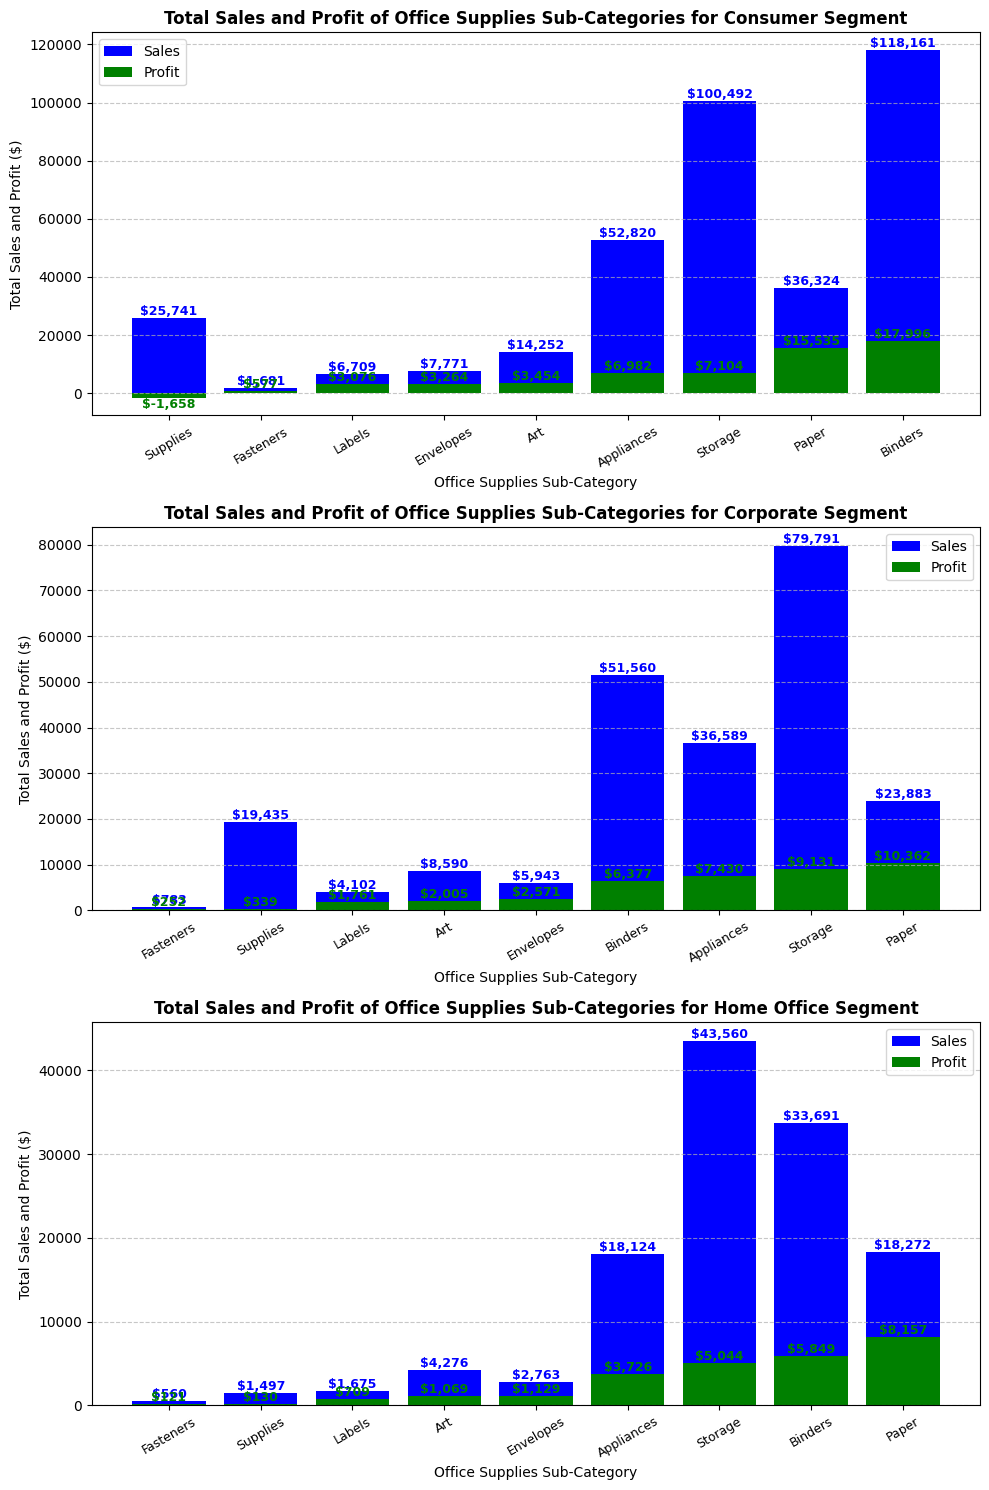

In [20]:
# Now let's take a look at cutoemr Segments

# Group sales and profit by sub-category and segment for Office Supplies
office_segment_sales_profits = df[df["Category"] == "Office Supplies"].groupby(["Segment", "Sub-Category"])[["Sales", "Profit"]].sum().reset_index()

# Sort by Profit within each segment
office_segment_sales_profits = office_segment_sales_profits.sort_values(by=["Segment", "Profit"])

# Get unique segments
segments = office_segment_sales_profits["Segment"].unique()

# Create subplots for each customer segment
fig, axes = plt.subplots(nrows=len(segments), figsize=(10, len(segments) * 5))

# Ensure axes is iterable even if there's only one subplot
if len(segments) == 1:
    axes = [axes]

# Loop through each segment and plot sales & profit for sub-categories
for i, segment in enumerate(segments):
    segment_data = office_segment_sales_profits[office_segment_sales_profits["Segment"] == segment]

    # Create subplot for this segment
    ax = axes[i]

    # Bar chart for Sales
    bars1 = ax.bar(segment_data["Sub-Category"], segment_data["Sales"], color='blue', label='Sales')

    # Bar chart for Profit
    bars2 = ax.bar(segment_data["Sub-Category"], segment_data["Profit"], color='green', label='Profit')

    # Add labels on Sales bars
    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", 
                ha='center', va='bottom', fontsize=9, color="blue", fontweight="bold")

    # Add labels on Profit bars with adjustments for negative values
    for bar in bars2:
        height = bar.get_height()
        if height >= 0:
            va_position = 'bottom'
            offset = 5
        else:
            va_position = 'top'
            offset = -5

        ax.text(bar.get_x() + bar.get_width()/2, height + offset, f"${height:,.0f}", 
                ha='center', va=va_position, fontsize=9, color="green", fontweight="bold")

    # Formatting
    ax.set_ylabel("Total Sales and Profit ($)", fontsize=10)
    ax.set_xlabel("Office Supplies Sub-Category", fontsize=10)
    ax.set_title(f"Total Sales and Profit of Office Supplies Sub-Categories for {segment} Segment", fontsize=12, fontweight="bold")
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks(range(len(segment_data["Sub-Category"])))
    ax.set_xticklabels(segment_data["Sub-Category"], rotation=30, fontsize=9)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


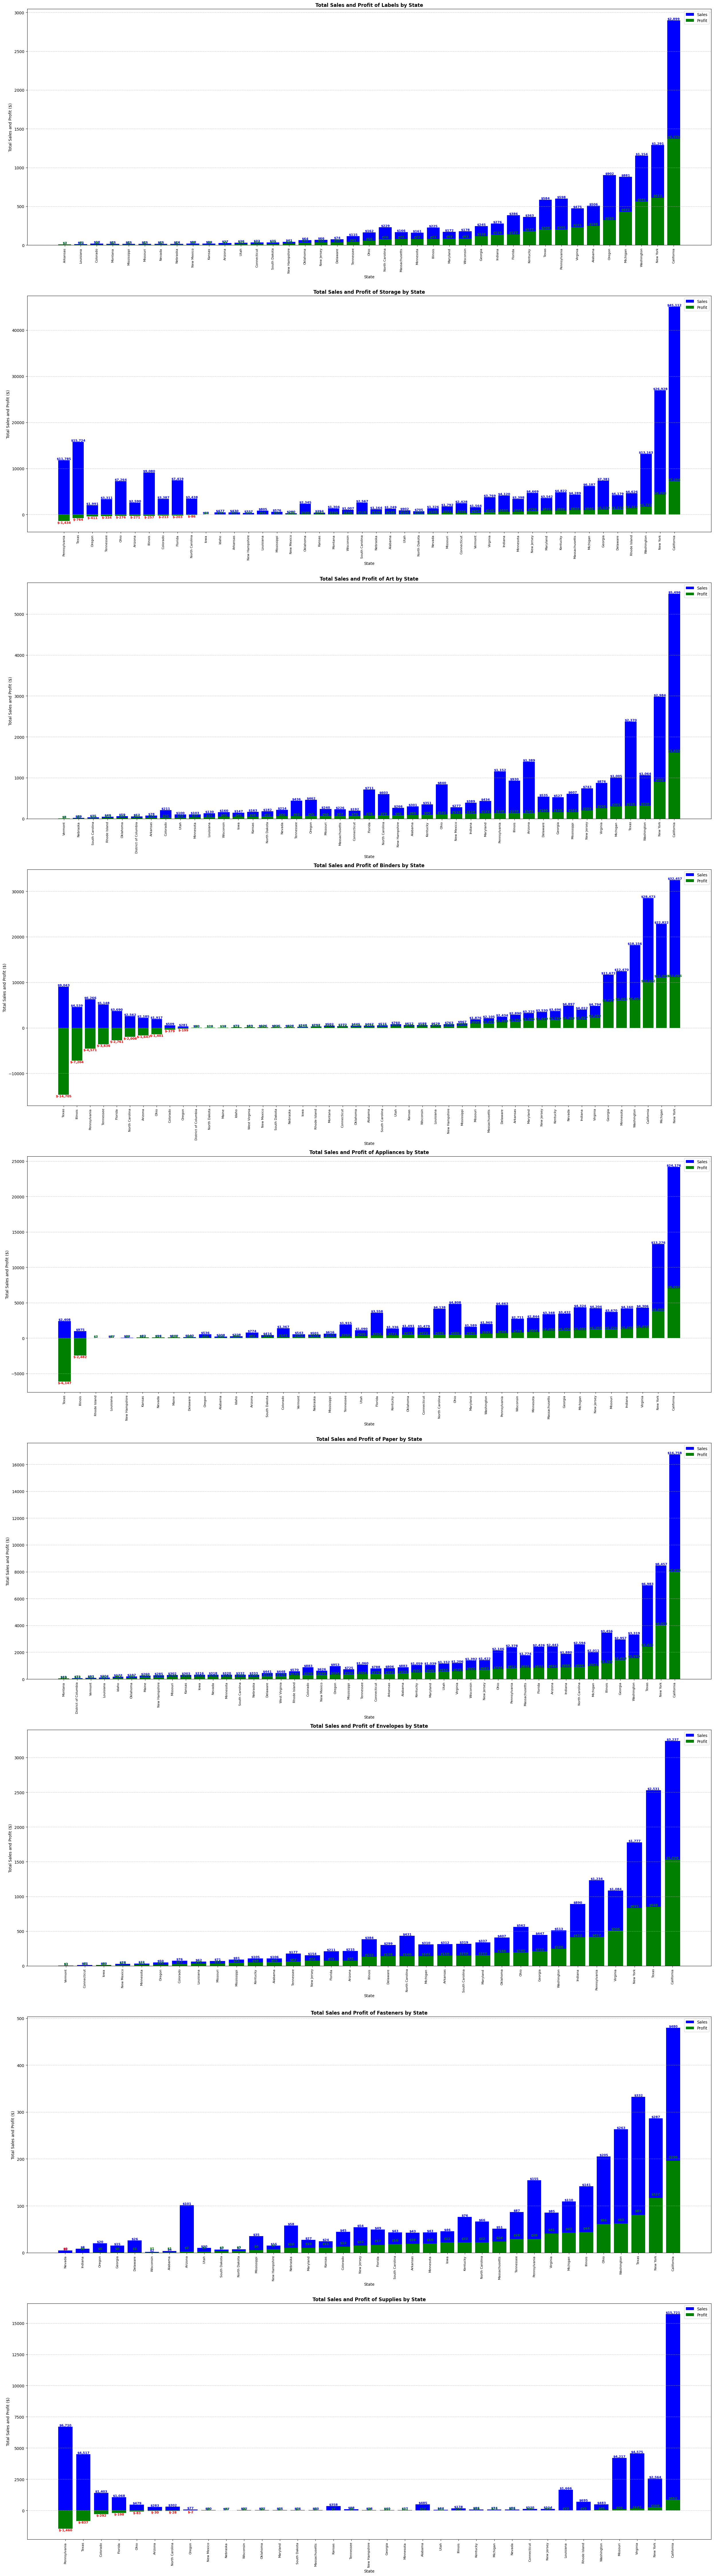

In [7]:
# Let's take a look at how these sub-categories are performing in each state.

# Get unique sub-categories for Office Supplies
office_supplies_subcategories = df[df["Category"] == "Office Supplies"]["Sub-Category"].unique()

# Create subplots for each sub-category
fig, axes = plt.subplots(nrows=len(office_supplies_subcategories), figsize=(25, len(office_supplies_subcategories) * 10))

# Ensure axes is iterable even if there's only one subplot
if len(office_supplies_subcategories) == 1:
    axes = [axes]

# Loop through each sub-category and plot a histogram-style bar chart for states
for i, sub_category in enumerate(office_supplies_subcategories):
    # Filter data for the current sub-category
    subcategory_state_data = df[(df["Category"] == "Office Supplies") & (df["Sub-Category"] == sub_category)]

    # Group by state and sum sales and profit
    state_sales_profits = subcategory_state_data.groupby("State")[["Sales", "Profit"]].sum().reset_index()

    # Sort states by profit (ascending)
    state_sales_profits = state_sales_profits.sort_values(by='Profit')

    # Create subplot for this sub-category
    ax = axes[i]

    # Bar chart for Sales
    bars1 = ax.bar(state_sales_profits["State"], state_sales_profits["Sales"], color='blue', label='Sales')

    # Bar chart for Profit
    bars2 = ax.bar(state_sales_profits["State"], state_sales_profits["Profit"], color='green', label='Profit')

    # Add labels on Sales bars
    for bar in bars1:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", 
                ha='center', va='bottom', fontsize=8, color="blue", fontweight="bold")

    # Add labels on Profit bars with adjustments for negative values
    for bar in bars2:
        height = bar.get_height()
        if height >= 0:
            va_position = 'bottom'  # Position above the bar for positive values
            offset = 5  # Offset upwards
        else:
            va_position = 'top'  # Position inside the bar for negative values
            offset = -5  # Offset downwards

        ax.text(bar.get_x() + bar.get_width()/2, height + offset, f"${height:,.0f}", 
                ha='center', va=va_position, fontsize=8, color="green" if height > 0 else "red", fontweight="bold")

    # Formatting
    ax.set_ylabel("Total Sales and Profit ($)", fontsize=10)
    ax.set_xlabel("State", fontsize=10)
    ax.set_title(f"Total Sales and Profit of {sub_category} by State", fontsize=12, fontweight="bold")
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # **Fix x-axis labels warning**
    ax.set_xticks(range(len(state_sales_profits["State"])))  # Set fixed ticks
    ax.set_xticklabels(state_sales_profits["State"], rotation=90, fontsize=8)  # Assign labels

# Adjust layout for clarity
plt.tight_layout()
plt.show()


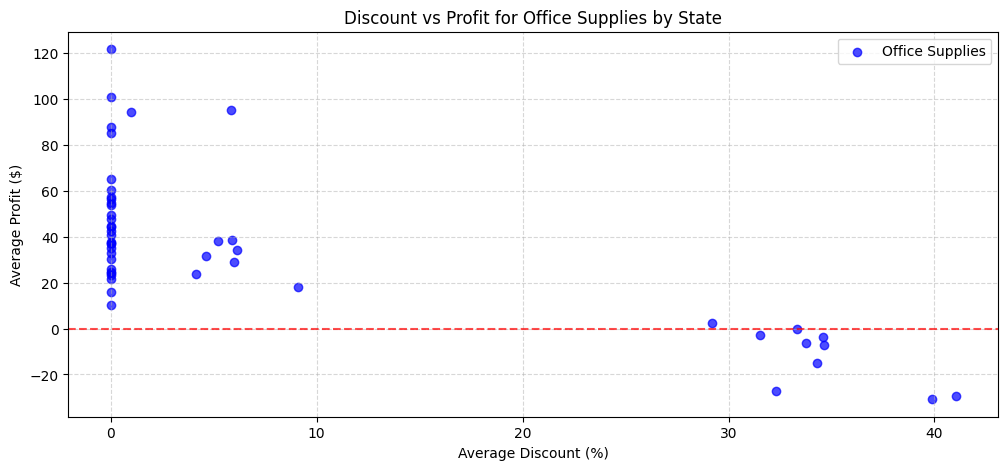

In [ ]:
# Distribution of Discounts vs Profits by State
Office_Supplies_discount = df[df["Category"] == "Office Supplies"].groupby("State")[["Discount", "Profit"]].mean().reset_index()

# Plot discounting patterns for Office Supplies
plt.figure(figsize=(12, 5))
plt.scatter(Office_Supplies_discount["Discount"] * 100, Office_Supplies_discount["Profit"], color='blue', label="Office Supplies", alpha=0.7)
plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Discount vs Profit for Office Supplies by State")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

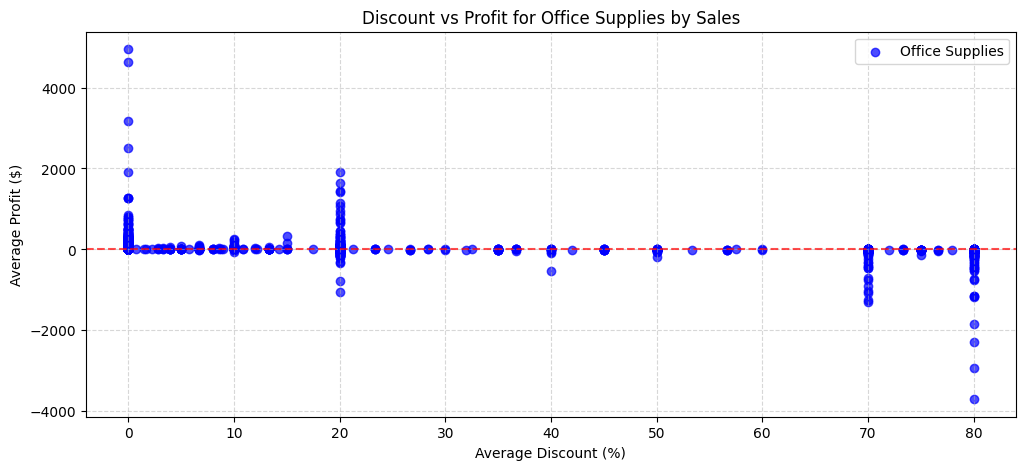

In [21]:
# Distribution of Discounts vs Profits by Sales

Office_Supplies_discount = df[df["Category"] == "Office Supplies"].groupby("Sales")[["Discount", "Profit"]].mean().reset_index()

# Plot discounting patterns for Office Supplies
plt.figure(figsize=(12, 5))
plt.scatter(Office_Supplies_discount["Discount"] * 100, Office_Supplies_discount["Profit"], color='blue', label="Office Supplies", alpha=0.7)
plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Discount vs Profit for Office Supplies by Sales")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [9]:
# Office Supplies does a is not as highly impacted by discounts as Furniture, losses don't begin to appear until the 28% discount mark.

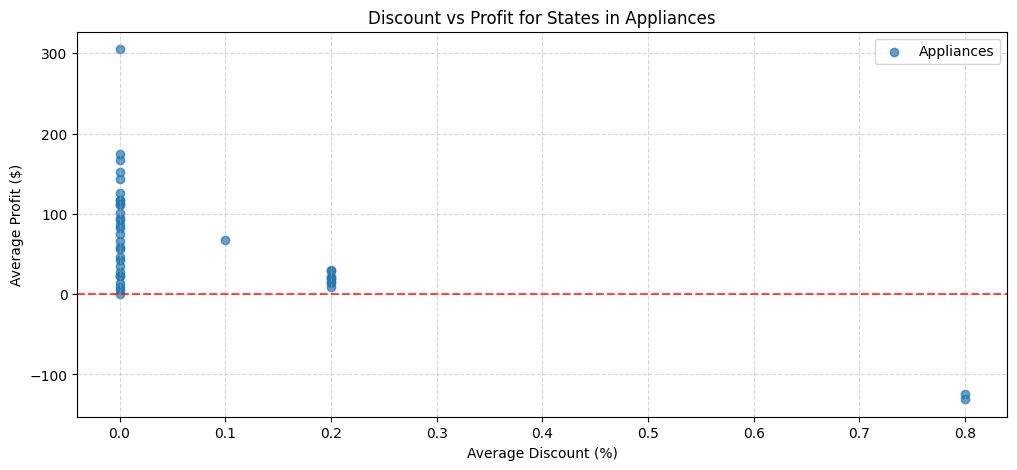

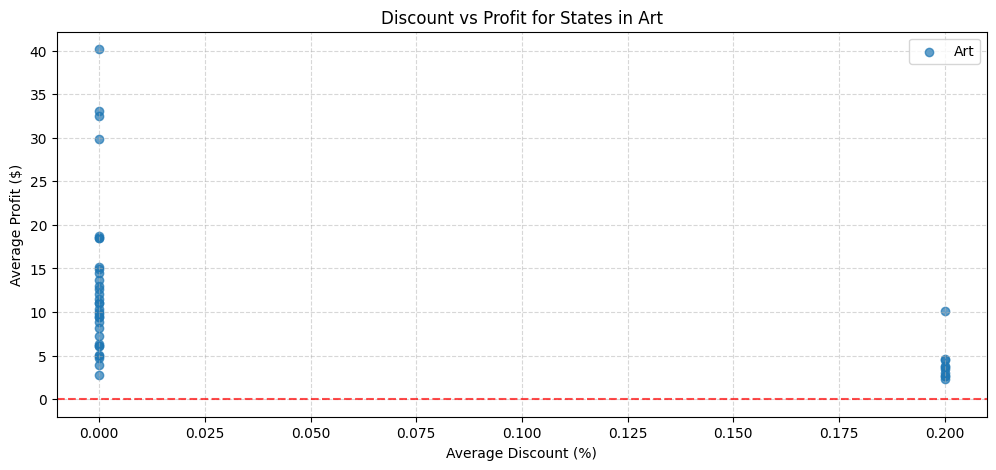

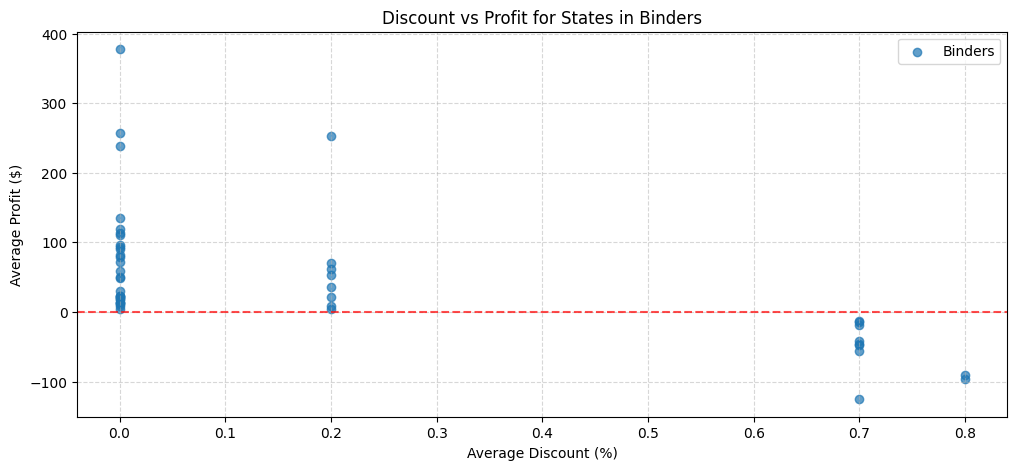

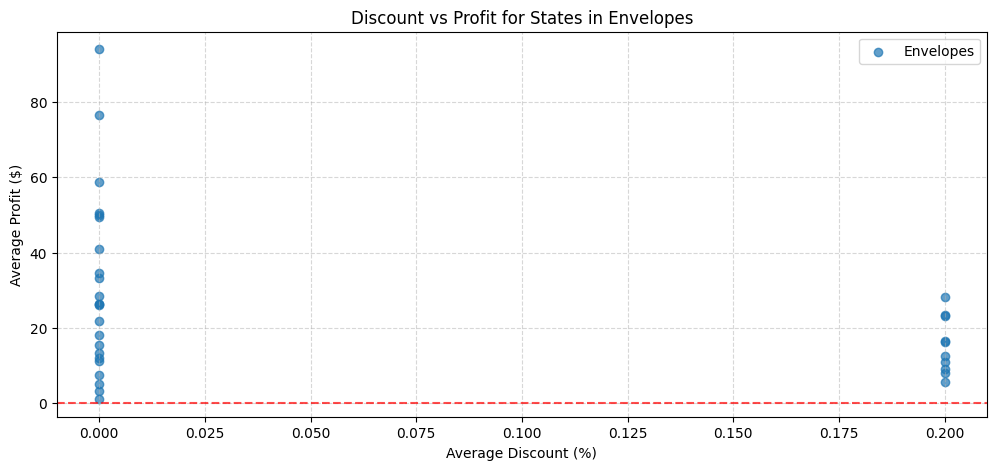

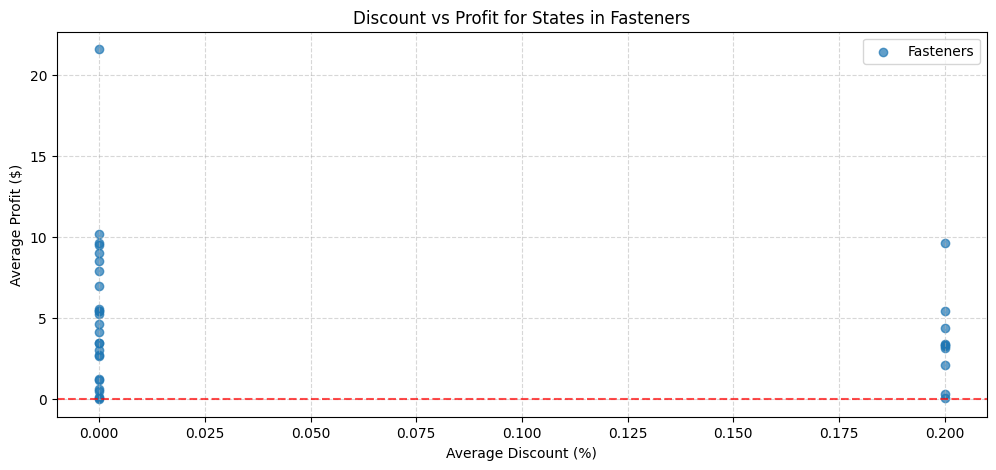

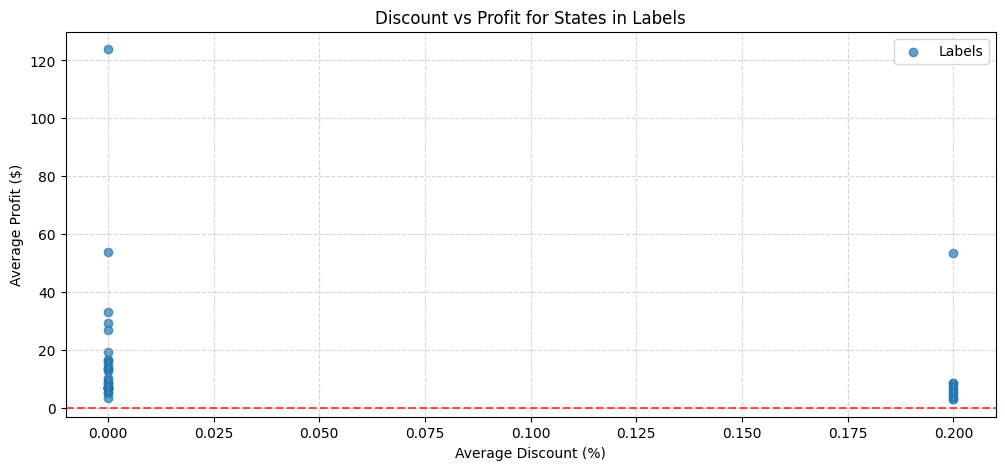

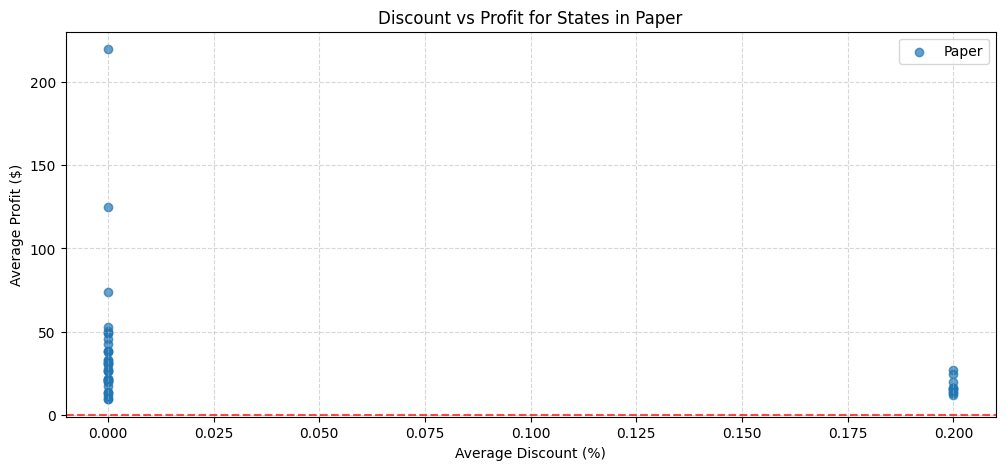

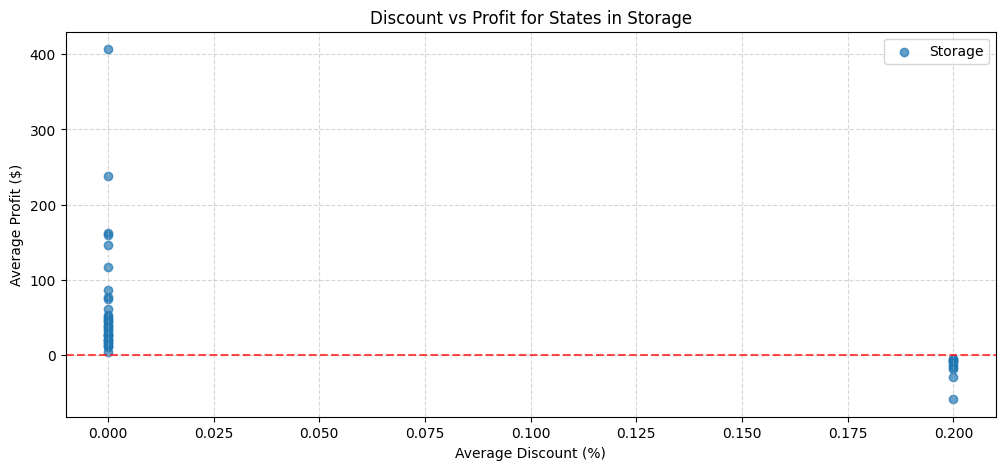

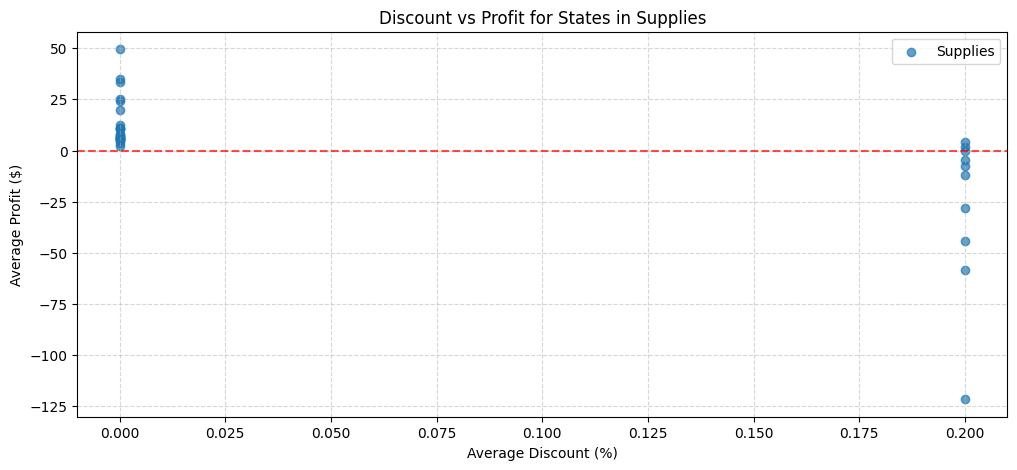

In [ ]:
# Once again, let's take a look at the discounts and profits for the Office Supplies sub categories, first up by State.
# Filter data for Office Supplies category
office_supplies_discount_analysis = df[df["Category"] == "Office Supplies"]

# Group by Sub-Category and State, calculate mean Discount and Profit
office_supplies_discount_analysis = office_supplies_discount_analysis.groupby(["Sub-Category", "State"])[["Discount", "Profit"]].mean().reset_index()

# Get unique sub-categories for Office Supplies
office_supplies_subcategories = office_supplies_discount_analysis["Sub-Category"].unique()

# Create scatter plots for each sub-category
for sub_category in office_supplies_subcategories:
    # Filter data for the current sub-category
    subcategory_discount_data = office_supplies_discount_analysis[office_supplies_discount_analysis["Sub-Category"] == sub_category]
    
    # Plot scatter plot for Discount vs Profit
    plt.figure(figsize=(12, 5))
    plt.scatter(subcategory_discount_data["Discount"], subcategory_discount_data["Profit"], alpha=0.7, label=sub_category)
    plt.xlabel("Average Discount (%)")
    plt.ylabel("Average Profit ($)")
    plt.title(f"Discount vs Profit for States in {sub_category}")
    plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

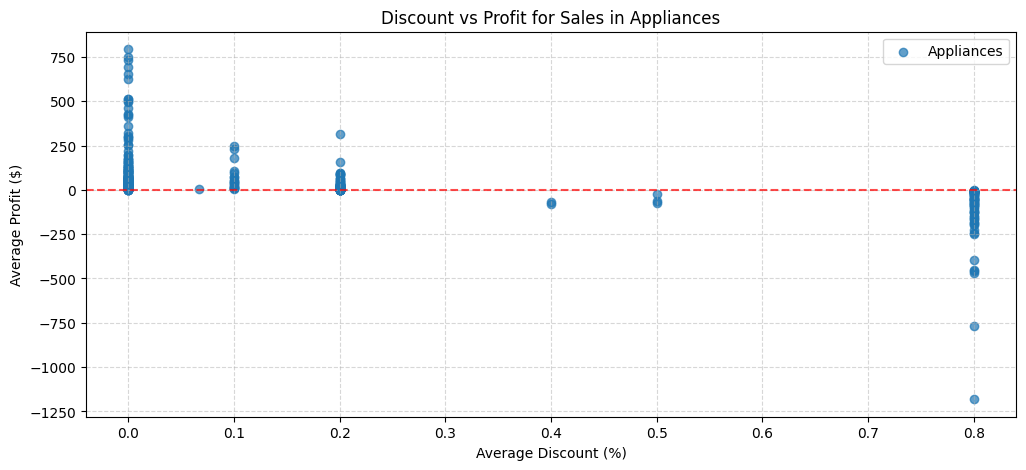

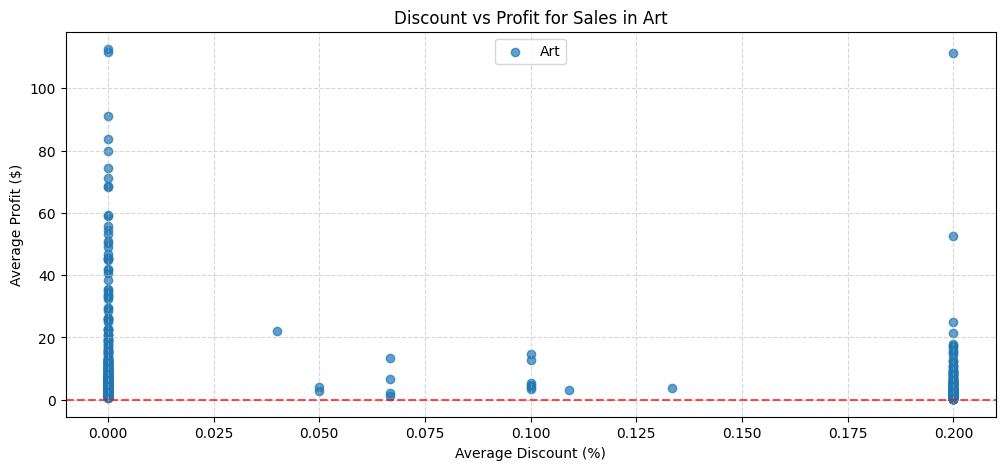

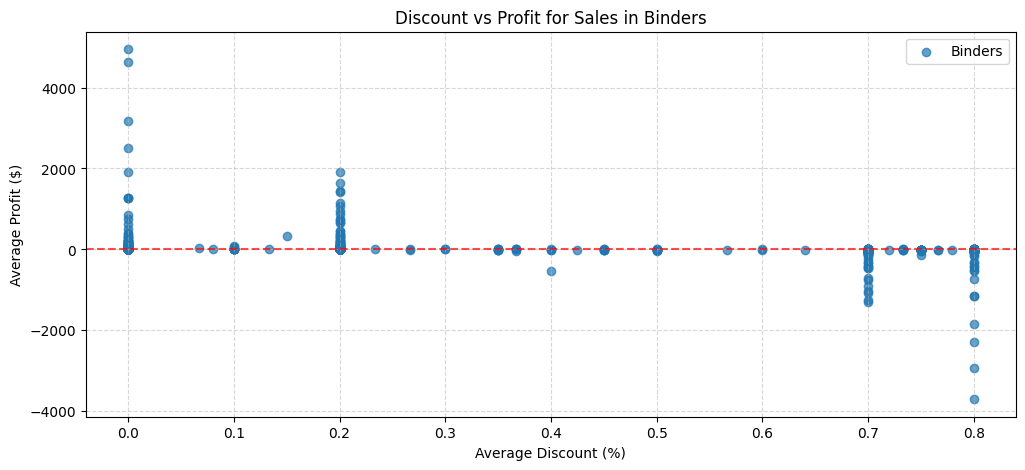

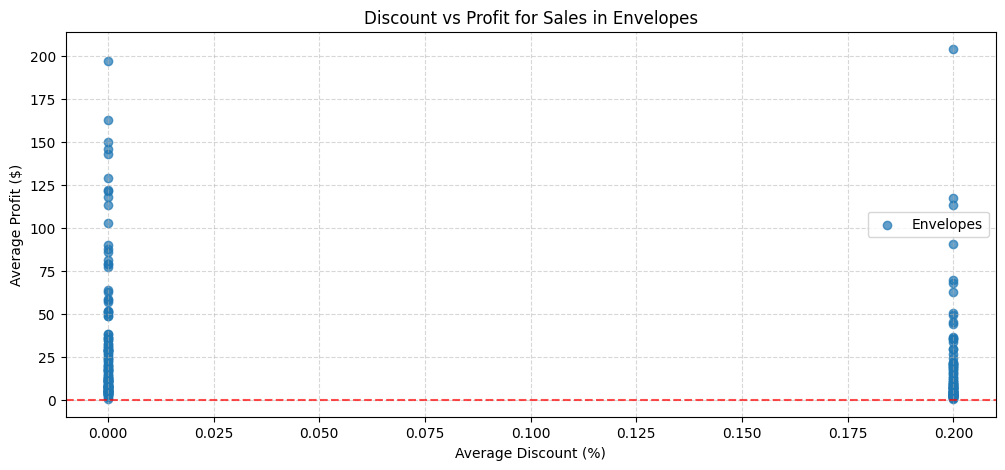

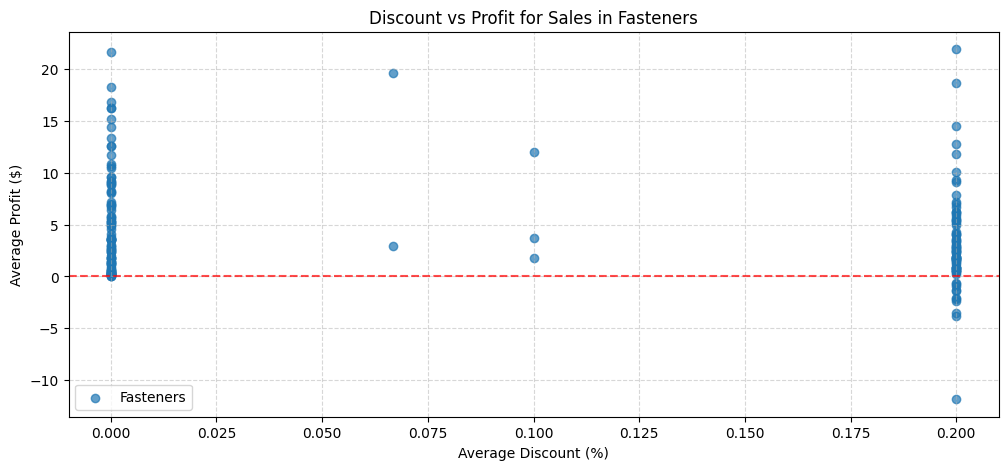

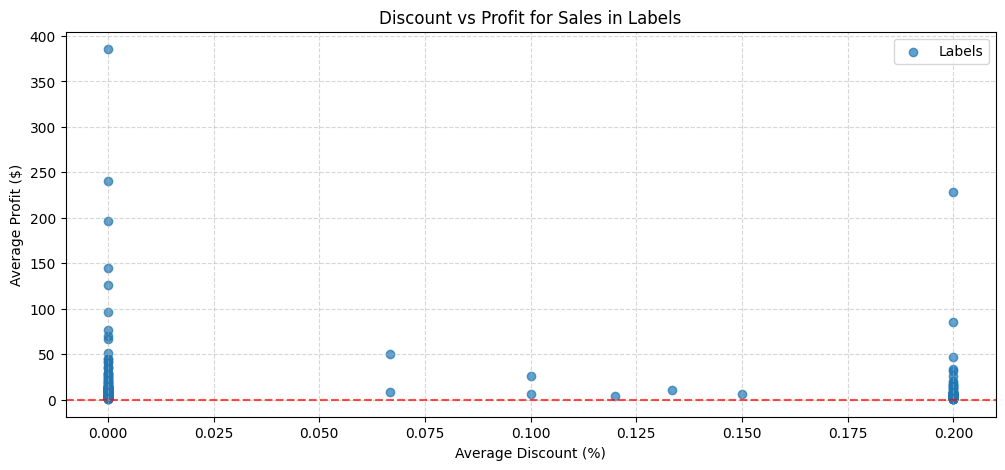

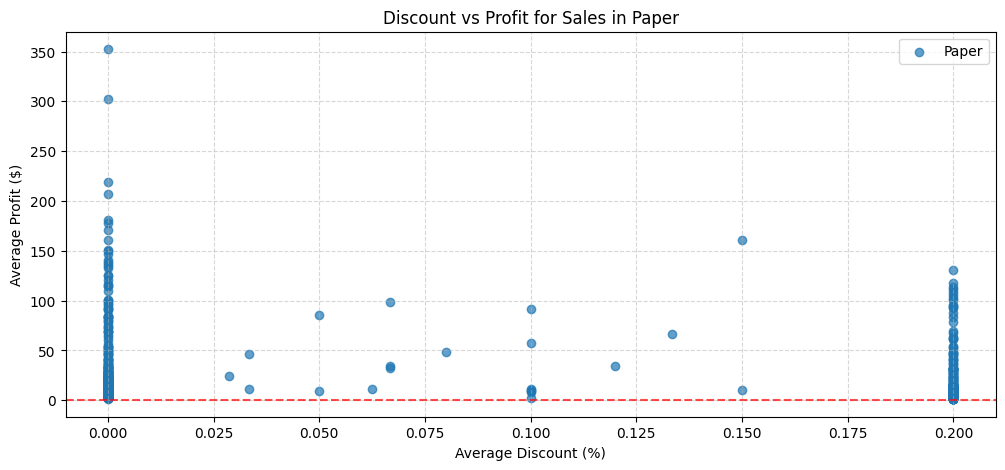

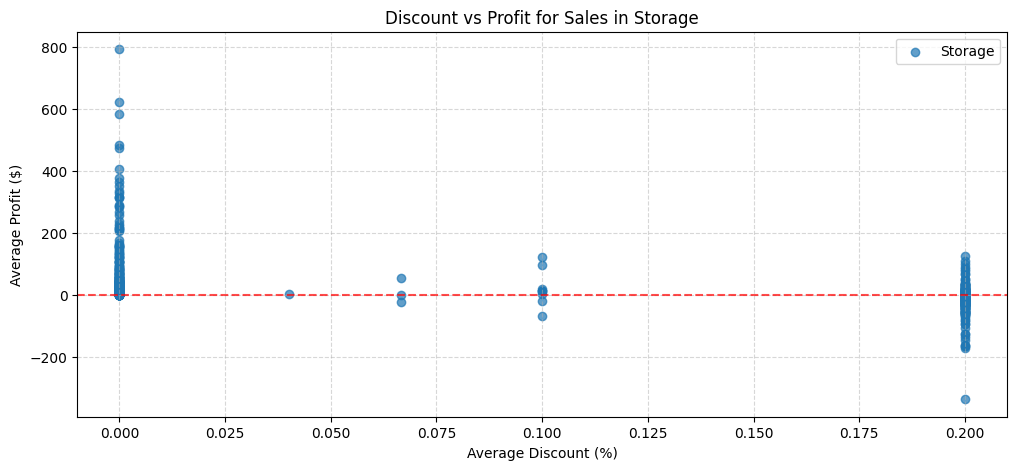

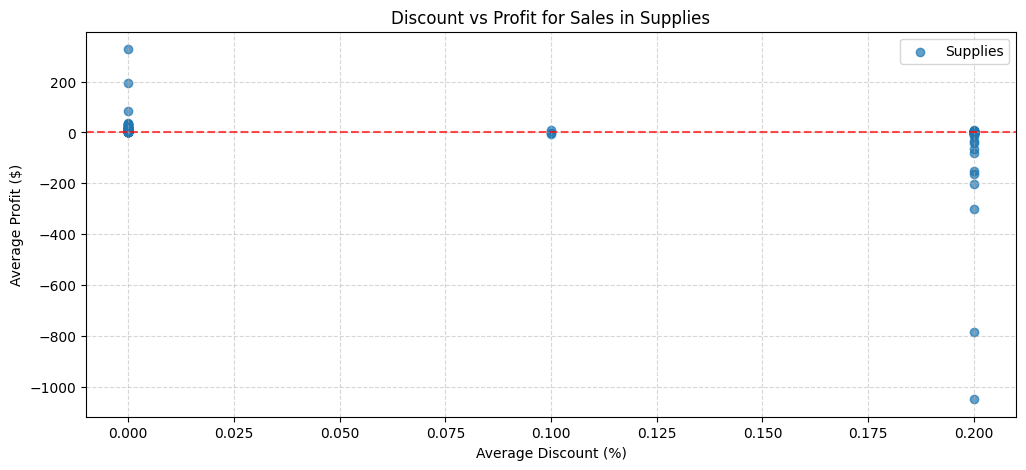

In [12]:
# Once again, let's take a look at the discounts and profits for the Office Supplies sub categories, now by Sales.
# Filter data for Office Supplies category
office_supplies_discount_analysis = df[df["Category"] == "Office Supplies"]

# Group by Sub-Category and State, calculate mean Discount and Profit
office_supplies_discount_analysis = office_supplies_discount_analysis.groupby(["Sub-Category", "Sales"])[["Discount", "Profit"]].mean().reset_index()

# Get unique sub-categories for Office Supplies
office_supplies_subcategories = office_supplies_discount_analysis["Sub-Category"].unique()

# Create scatter plots for each sub-category
for sub_category in office_supplies_subcategories:
    # Filter data for the current sub-category
    subcategory_discount_data = office_supplies_discount_analysis[office_supplies_discount_analysis["Sub-Category"] == sub_category]
    
    # Plot scatter plot for Discount vs Profit
    plt.figure(figsize=(12, 5))
    plt.scatter(subcategory_discount_data["Discount"], subcategory_discount_data["Profit"], alpha=0.7, label=sub_category)
    plt.xlabel("Average Discount (%)")
    plt.ylabel("Average Profit ($)")
    plt.title(f"Discount vs Profit for Sales in {sub_category}")
    plt.axhline(0, color="red", linestyle="--", alpha=0.7)  # Reference line for zero profit
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [ ]:
# All office supplies sub categories remain profitable at the 20% discount rate except for Supplies and Storage. These  two become unprofitable at the 10% discount rate.
# Binders and Appliances are OK at 20%, but they bring in huge losses at the 70 - 80% discount rate.
# Le'ts take a look at customer segments next.

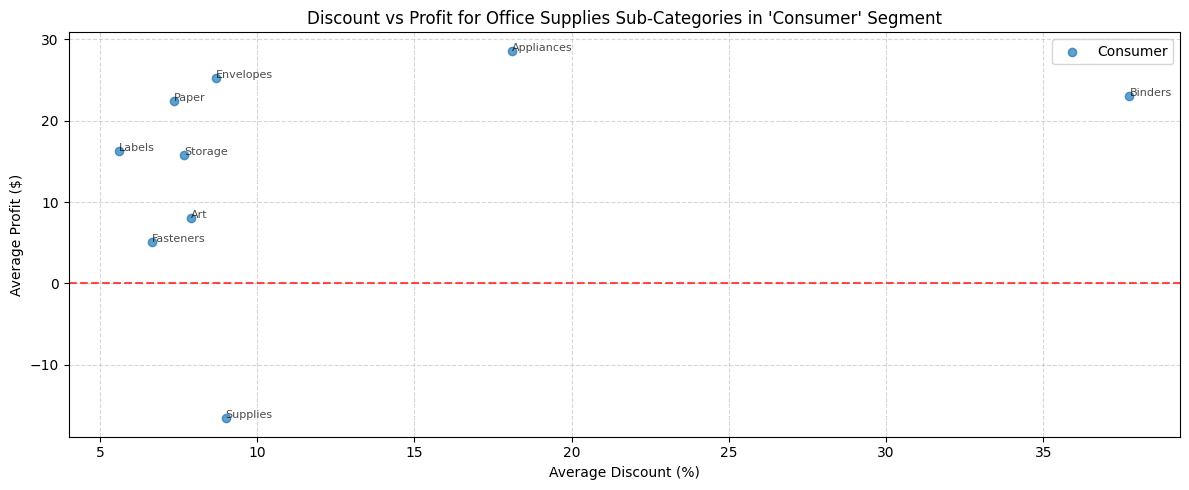

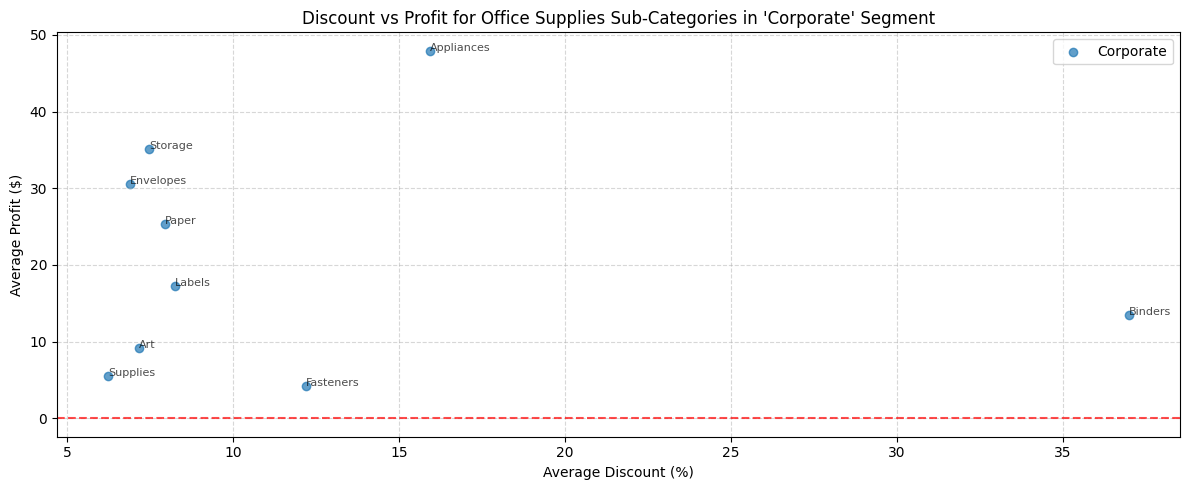

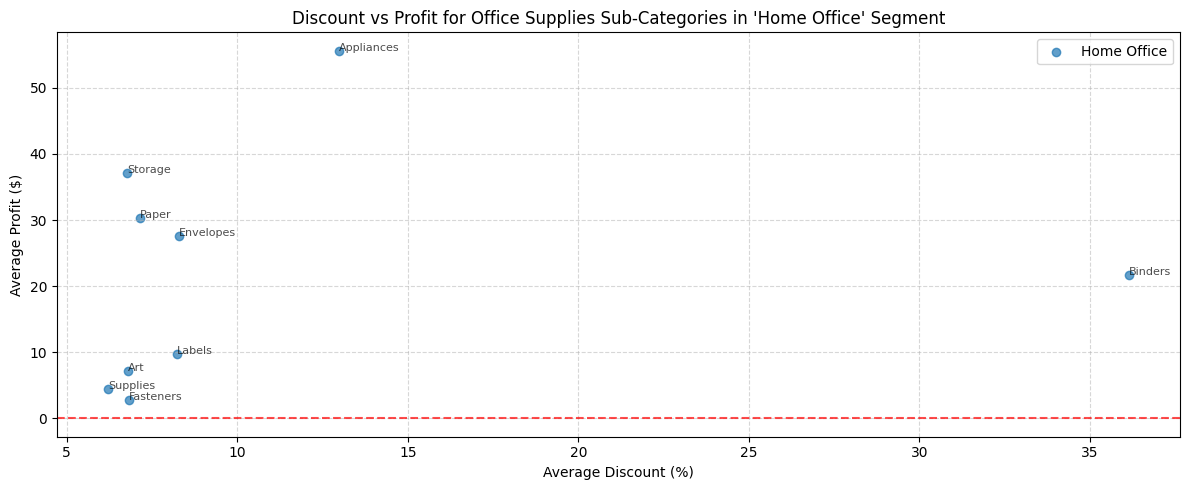

In [3]:
# Filter for Home Office category
home_office_discount_segment_analysis = df[df["Category"] == "Office Supplies"]

# Group by Segment and Sub-Category, calculate mean Discount and Profit
home_office_discount_segment_analysis = home_office_discount_segment_analysis.groupby(
    ["Segment", "Sub-Category"]
)[["Discount", "Profit"]].mean().reset_index()

# Get unique customer segments
segments = home_office_discount_segment_analysis["Segment"].unique()

# Create scatter plots for each customer segment with labeled sub-categories
for segment in segments:
    segment_discount_data = home_office_discount_segment_analysis[
        home_office_discount_segment_analysis["Segment"] == segment
    ]

    # Plot scatter plot for Discount vs Profit
    plt.figure(figsize=(12, 5))
    plt.scatter(segment_discount_data["Discount"] * 100, segment_discount_data["Profit"],
                alpha=0.7, label=segment)

    # Annotate each point with its sub-category
    for _, row in segment_discount_data.iterrows():
        plt.text(row["Discount"] * 100, row["Profit"], row["Sub-Category"],
                 fontsize=8, alpha=0.7)

    plt.xlabel("Average Discount (%)")
    plt.ylabel("Average Profit ($)")
    plt.title(f"Discount vs Profit for Office Supplies Sub-Categories in '{segment}' Segment")
    plt.axhline(0, color="red", linestyle="--", alpha=0.7)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
# Consumers bring in losses for Supplies at discounts rates as low as 10%. It seems the Consumer segment is the sole reason for the losses in the Supplies sub-category.
# The Home Office segment is profitable at all discount rates for all sub-categories except for Supplies and Storage. These two sub-categories are unprofitable at the 10% discount rate.
# Apart from this, no customer segment bring in losses at any discount rate overall. 
# This is indicative that the loss generating states have poor dicounting strategies.

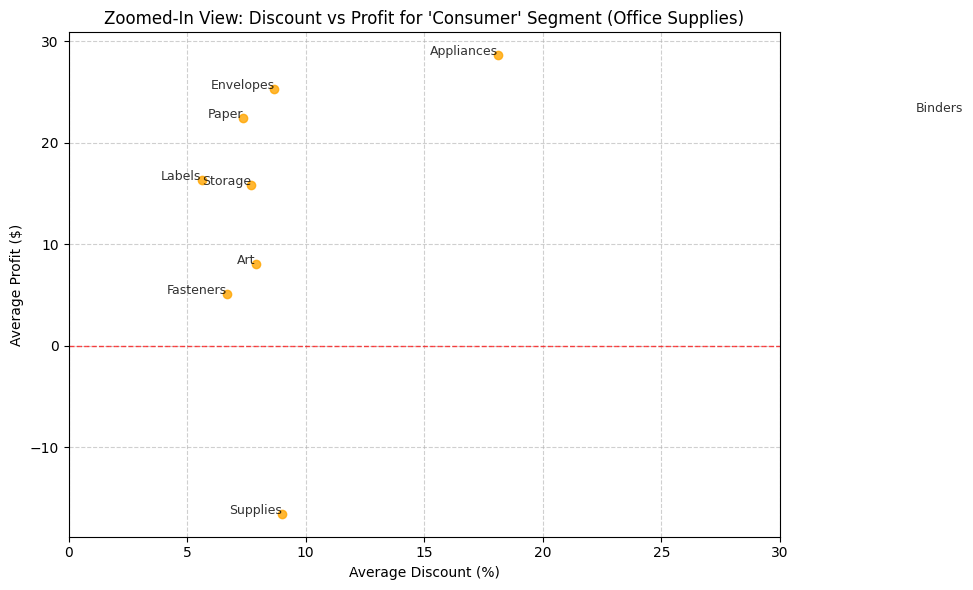

In [5]:

consumer_discount_data = df[
    (df["Category"] == "Office Supplies") &
    (df["Segment"] == "Consumer")
]

# Group by Sub-Category and calculate mean Discount and Profit
consumer_discount_summary = consumer_discount_data.groupby("Sub-Category")[["Discount", "Profit"]].mean().reset_index()

# Create zoomed-in scatter plot for low discounts
plt.figure(figsize=(10, 6))
plt.scatter(consumer_discount_summary["Discount"] * 100, consumer_discount_summary["Profit"], alpha=0.8, color='orange')

# Annotate points with sub-category names
for _, row in consumer_discount_summary.iterrows():
    plt.text(row["Discount"] * 100, row["Profit"], row["Sub-Category"], fontsize=9, ha='right', alpha=0.8)

# Zoom into low discount range
plt.xlim(0, 30)  # Zoomed into 0% to 30% discount range
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)

plt.xlabel("Average Discount (%)")
plt.ylabel("Average Profit ($)")
plt.title("Zoomed-In View: Discount vs Profit for 'Consumer' Segment (Office Supplies)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


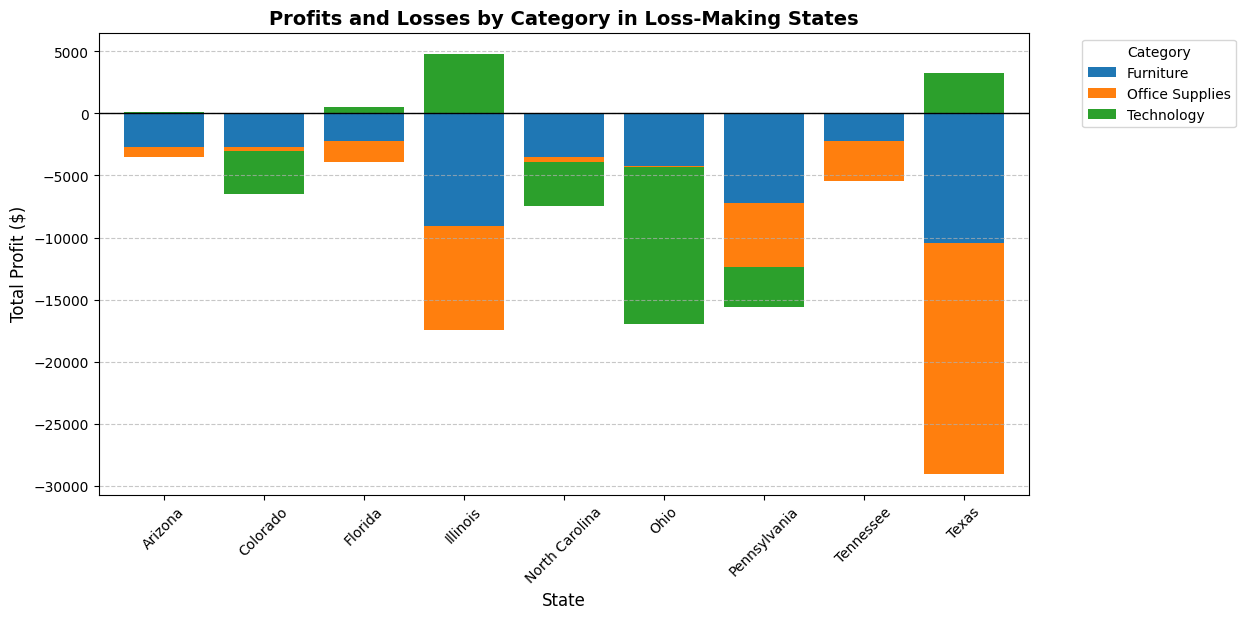

In [ ]:
# Let's take at our loss making states next.

# Define the list of loss-making states
loss_making_states = ["Texas", "Ohio", "Pennsylvania", "Illinois", "North Carolina", 
                      "Colorado", "Tennessee", "Arizona", "Florida"]

# Filter the dataset for these states
df_loss_states = df[df["State"].isin(loss_making_states)]

# Group by Category and State, summing up the profits
category_state_profits = df_loss_states.groupby(["State", "Category"])["Profit"].sum().unstack()

# Plot bar chart for profits/losses by category in these states
category_state_profits.plot(kind="bar", figsize=(12, 6), width=0.8, stacked=True)

# Formatting
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Profit ($)", fontsize=12)
plt.title("Profits and Losses by Category in Loss-Making States", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)  # Rotate state labels for better visibility
plt.axhline(0, color="black", linewidth=1)  # Reference line for zero profit
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



In [ ]:
# As you can see her, some states are making huge losses in office supplies, particularly Texas and Illinois.
# Let's take a cloes look at the discount strategies in these states.

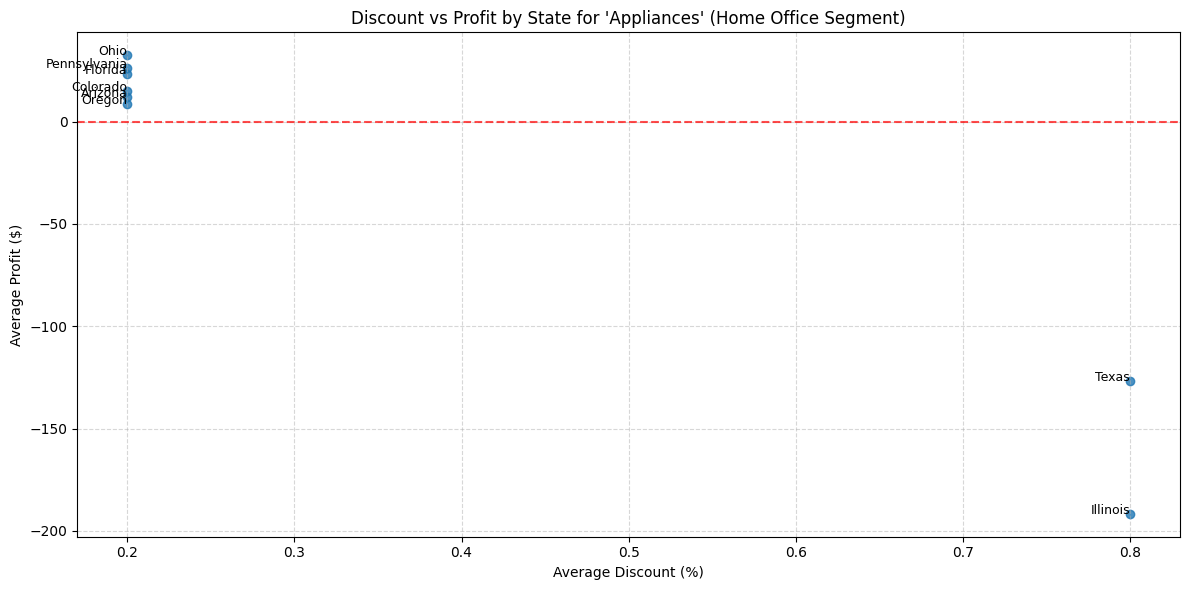

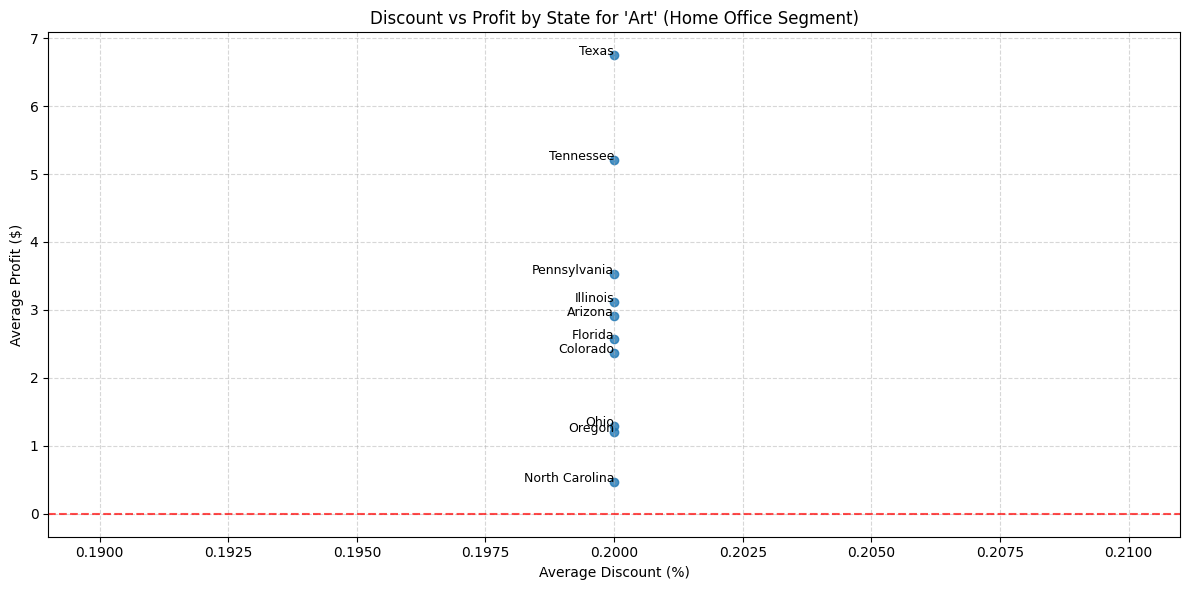

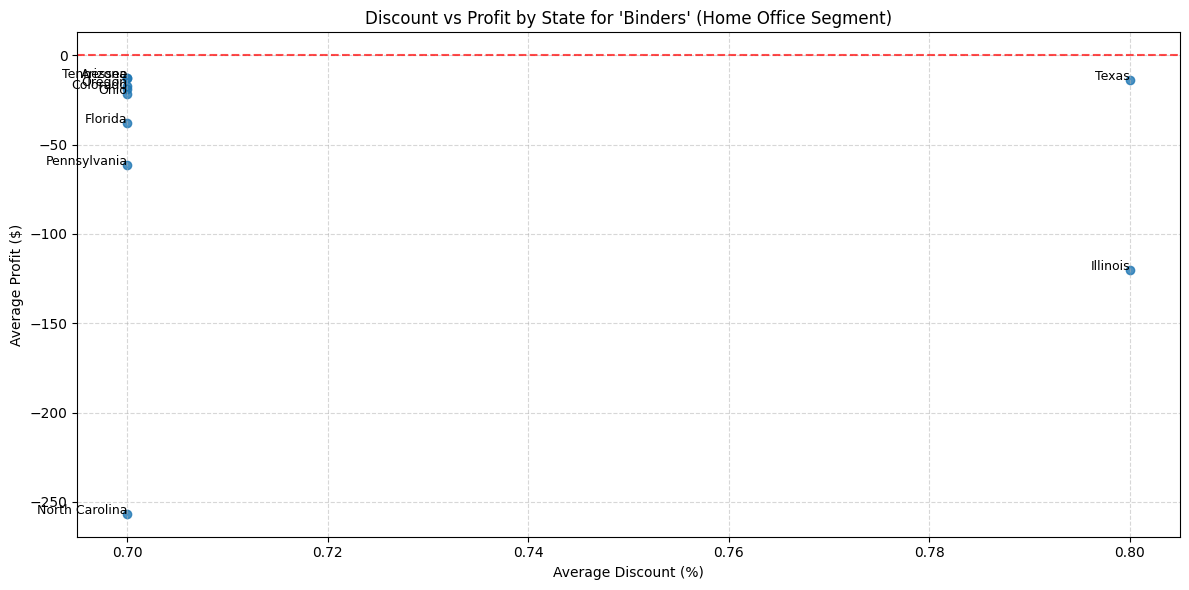

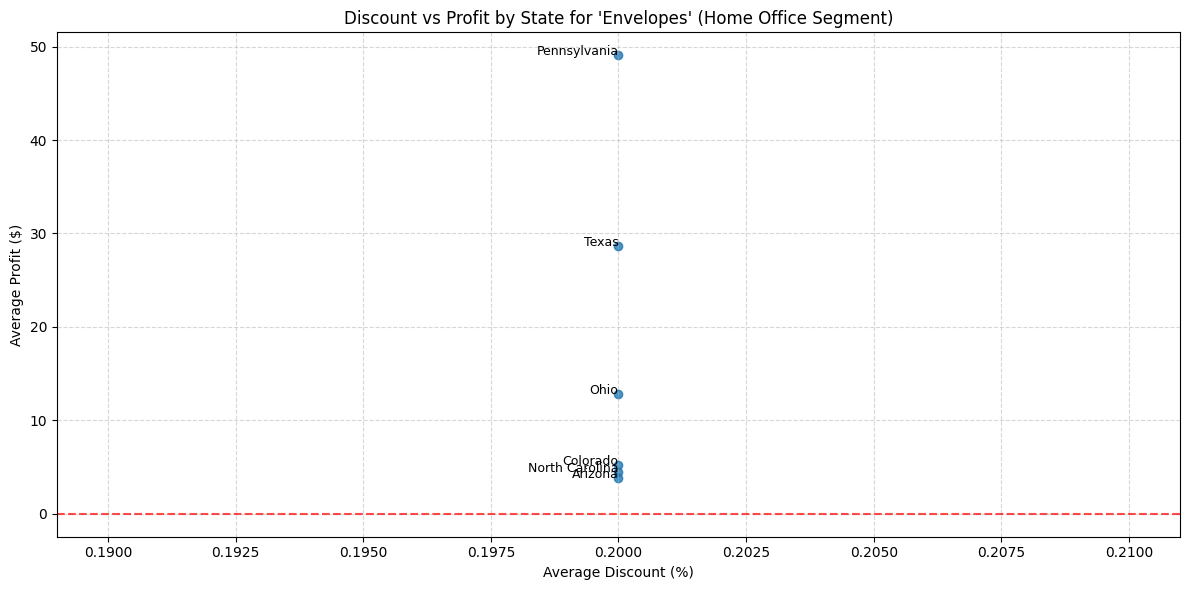

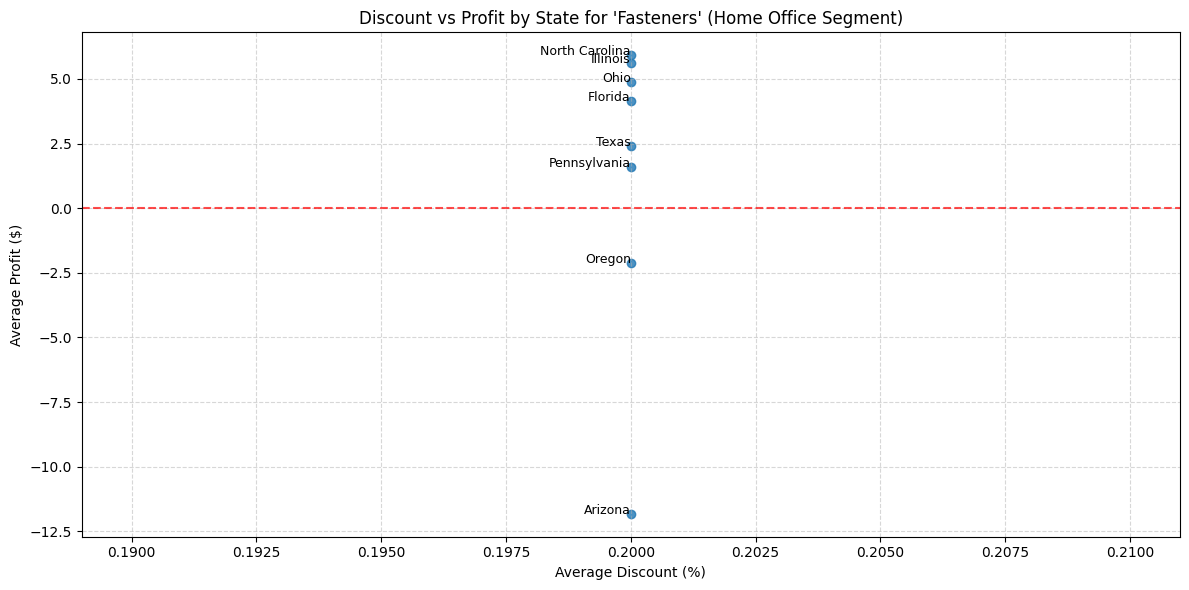

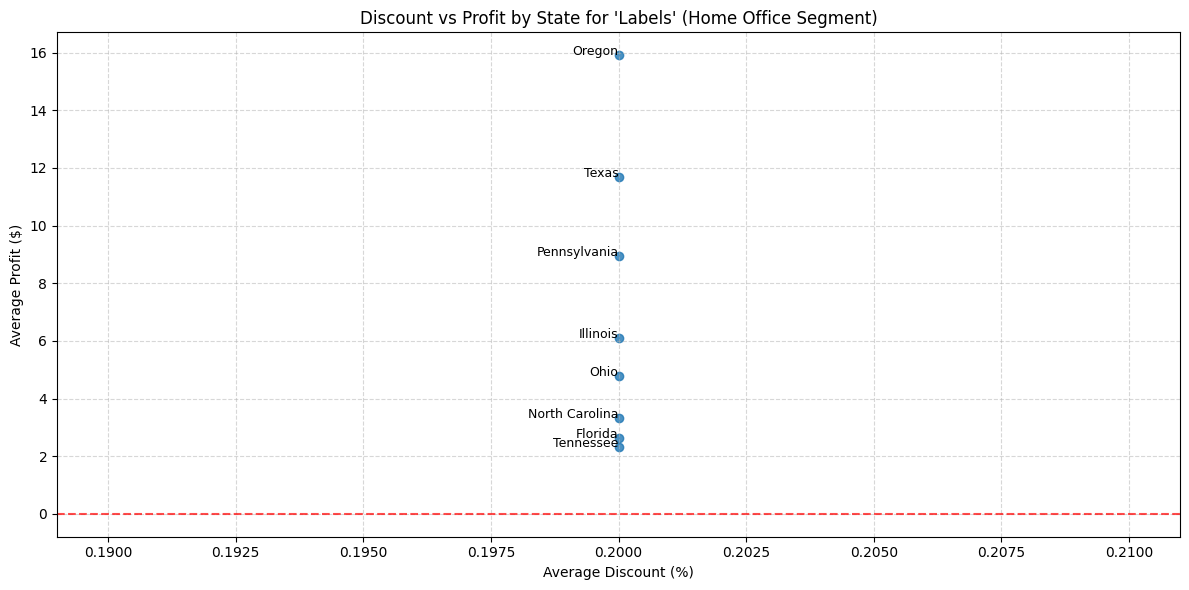

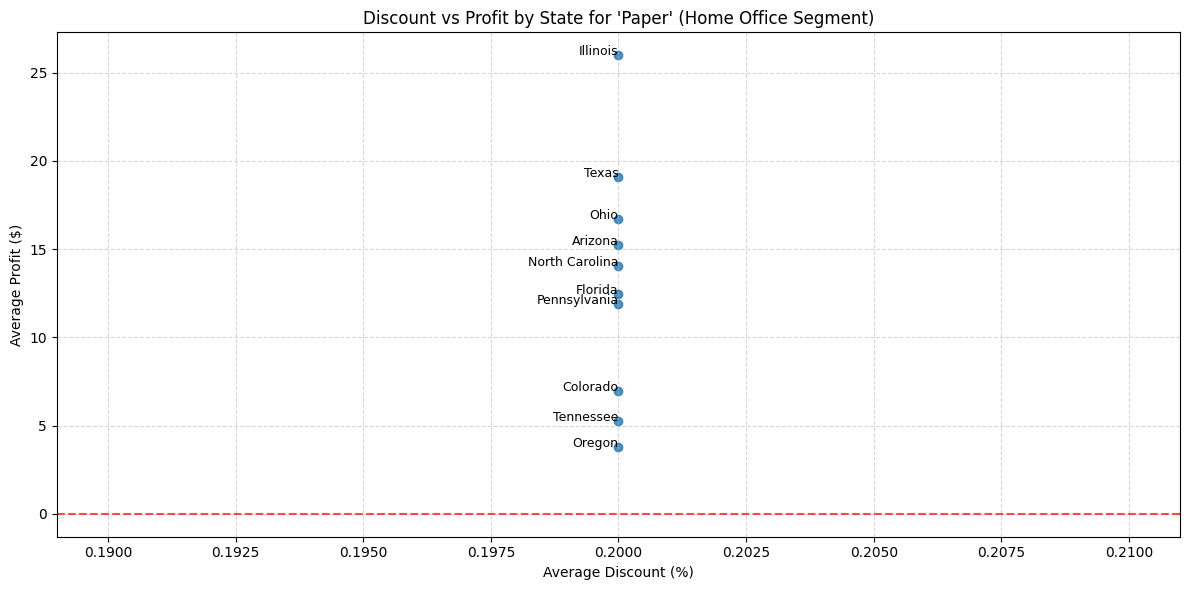

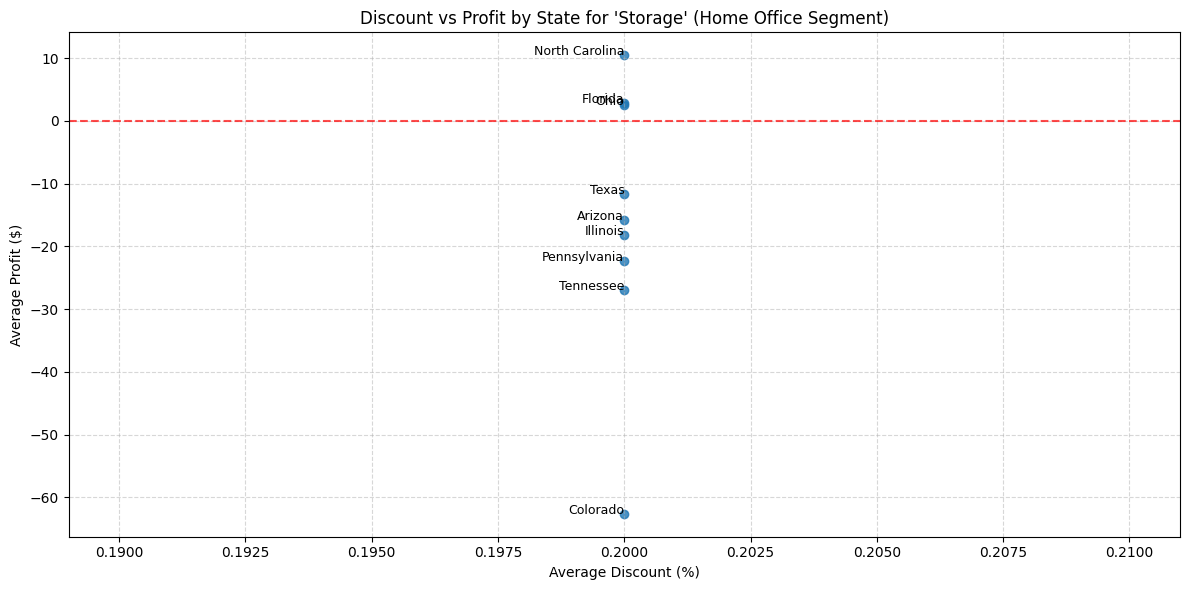

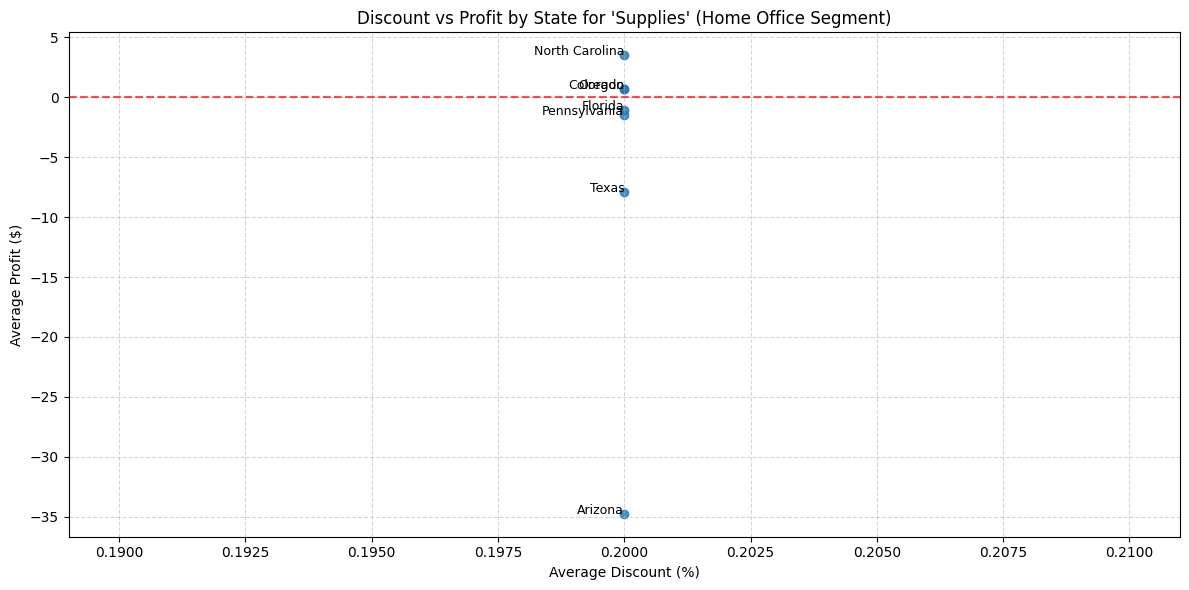

In [20]:
# Define the list of states to analyze
selected_states = [
    "Texas", "Ohio", "Pennsylvania", "Illinois", "North Carolina",
    "Colorado", "Tennessee", "Arizona", "Florida", "Oregon"
]

# Filter for Home Office segment and selected states in the Office Supplies category
home_office_selected_states = df[
    (df["Category"] == "Office Supplies") &
    (df["Segment"] == "Home Office") &
    (df["State"].isin(selected_states))
]

# Group by Sub-Category and State, calculate mean Discount and Profit
home_office_subcat_summary = home_office_selected_states.groupby(
    ["Sub-Category", "State"]
)[["Discount", "Profit"]].mean().reset_index()

# Get unique sub-categories
subcategories = home_office_subcat_summary["Sub-Category"].unique()

# Create scatter plots for each sub-category
for sub_category in subcategories:
    subcat_data = home_office_subcat_summary[
        home_office_subcat_summary["Sub-Category"] == sub_category
    ]
    
    plt.figure(figsize=(12, 6))
    plt.scatter(subcat_data["Discount"], subcat_data["Profit"], alpha=0.8)
    
    # Annotate points with state names
    for i, row in subcat_data.iterrows():
        plt.text(row["Discount"], row["Profit"], row["State"], fontsize=9, ha='right')
    
    plt.xlabel("Average Discount (%)")
    plt.ylabel("Average Profit ($)")
    plt.title(f"Discount vs Profit by State for '{sub_category}' (Home Office Segment)")
    plt.axhline(0, color="red", linestyle="--", alpha=0.7)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



In [ ]:
# Once again, Storage and Supplies suffer losses once they hit the 20% discount rate across the board.
# Oregon and Arizona are seeing losses 20% for Fasteners but this is an outlier.
# Once again, Texas and Illinois are bringin in losses by discounting at the 70 - 80% rate.
# This confirms that these states have poor discounting strategies.

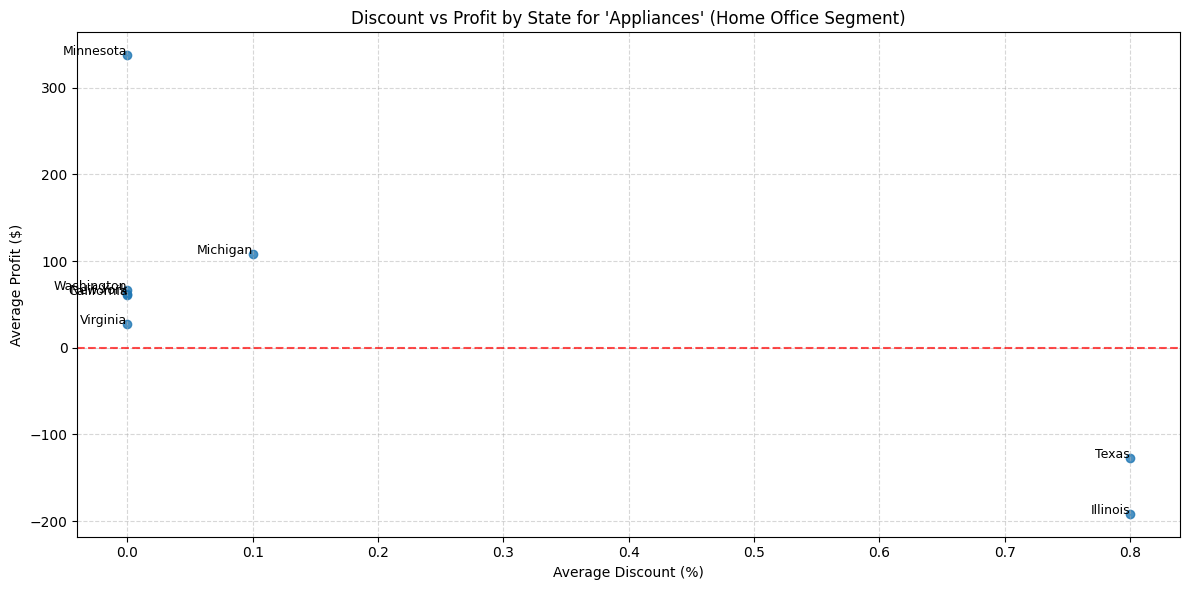

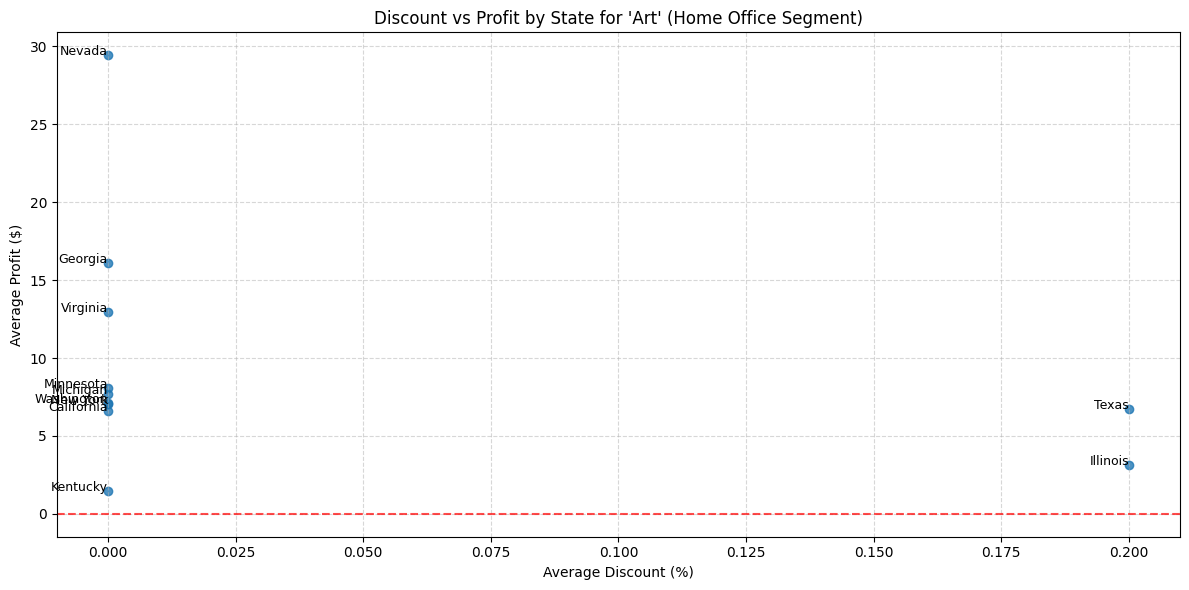

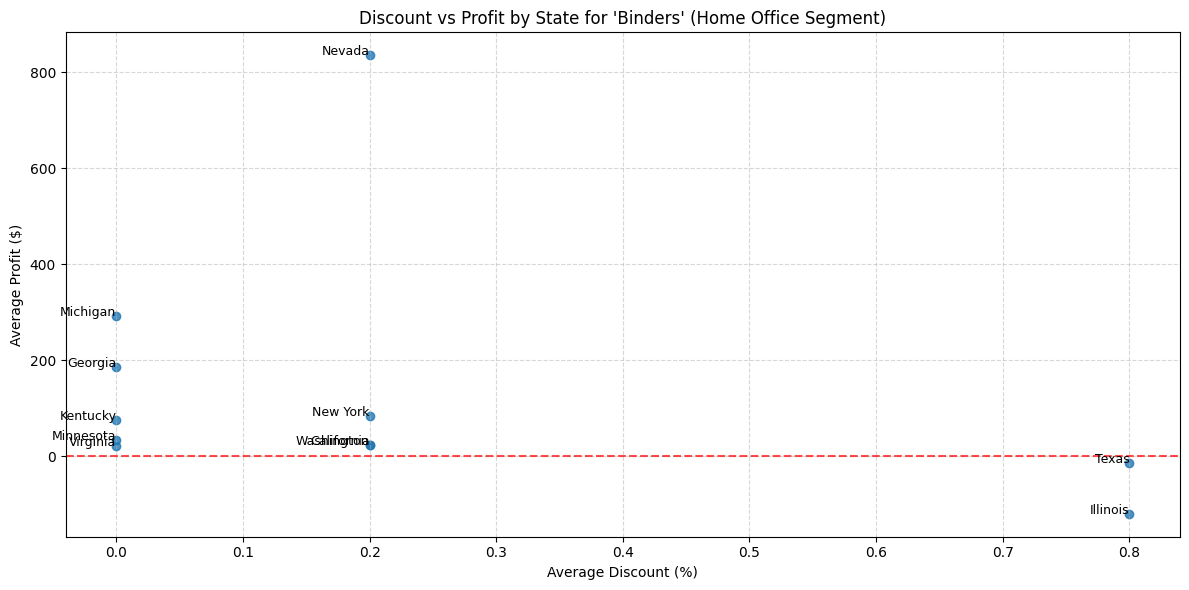

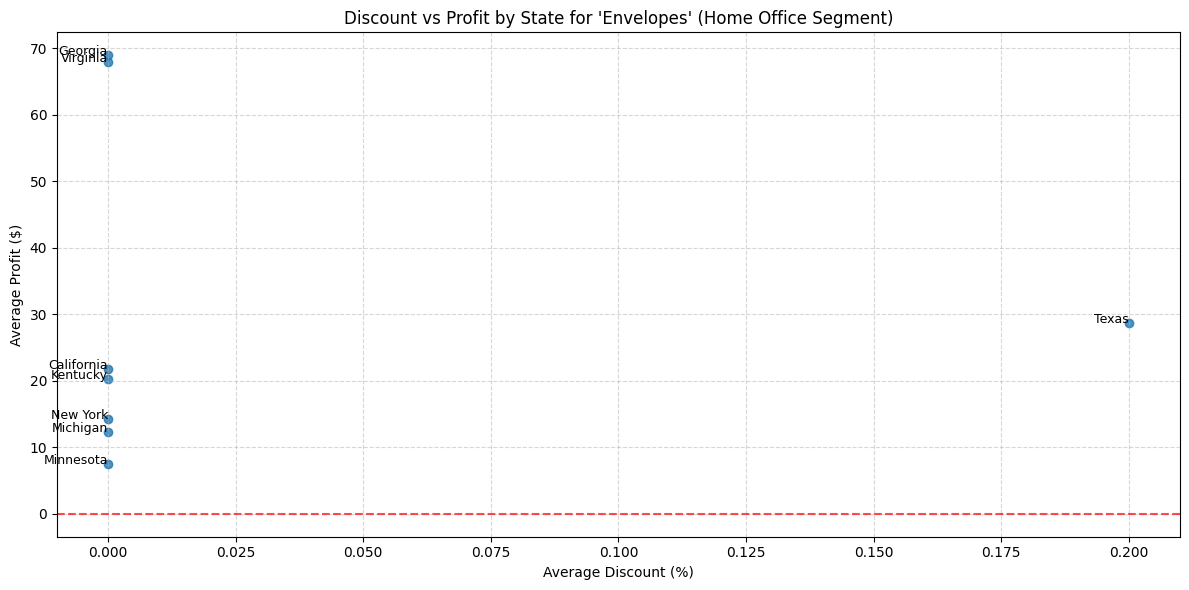

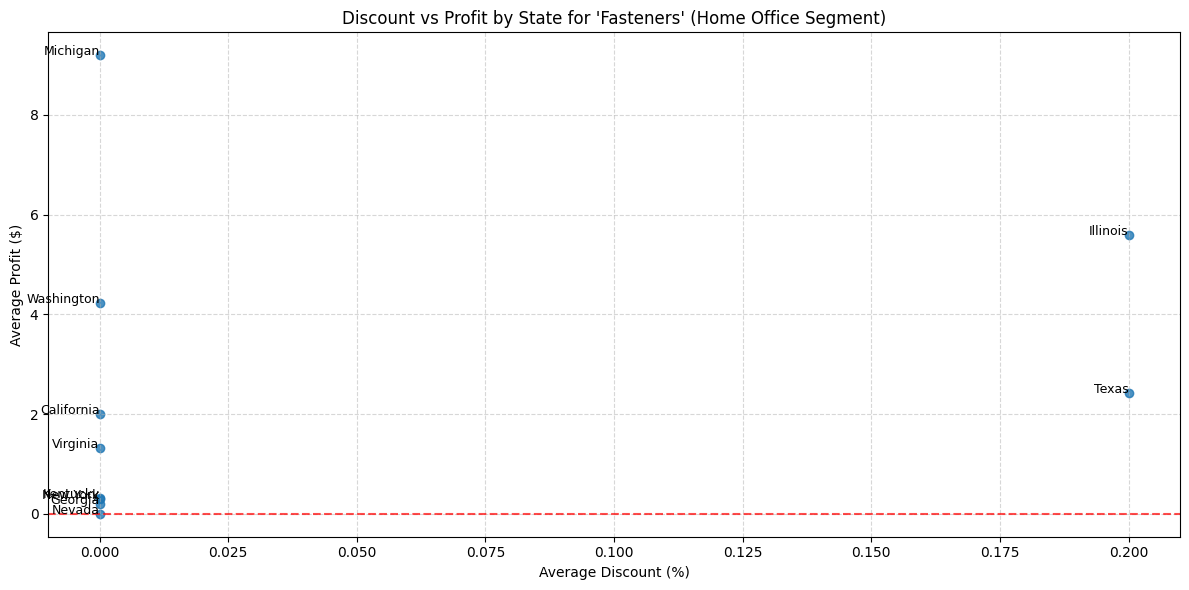

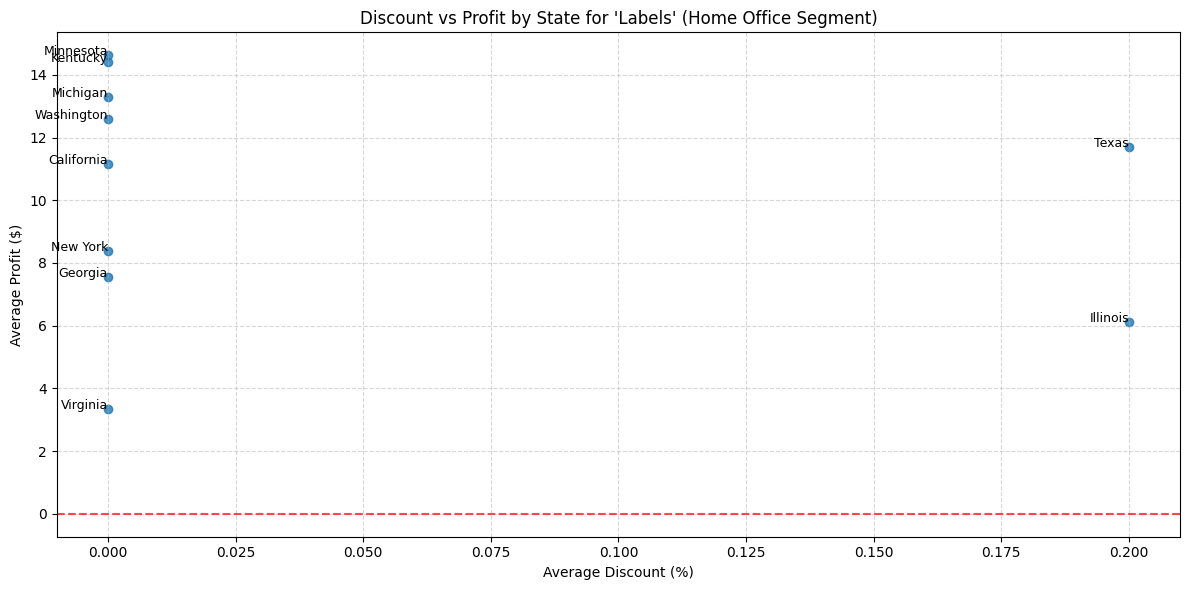

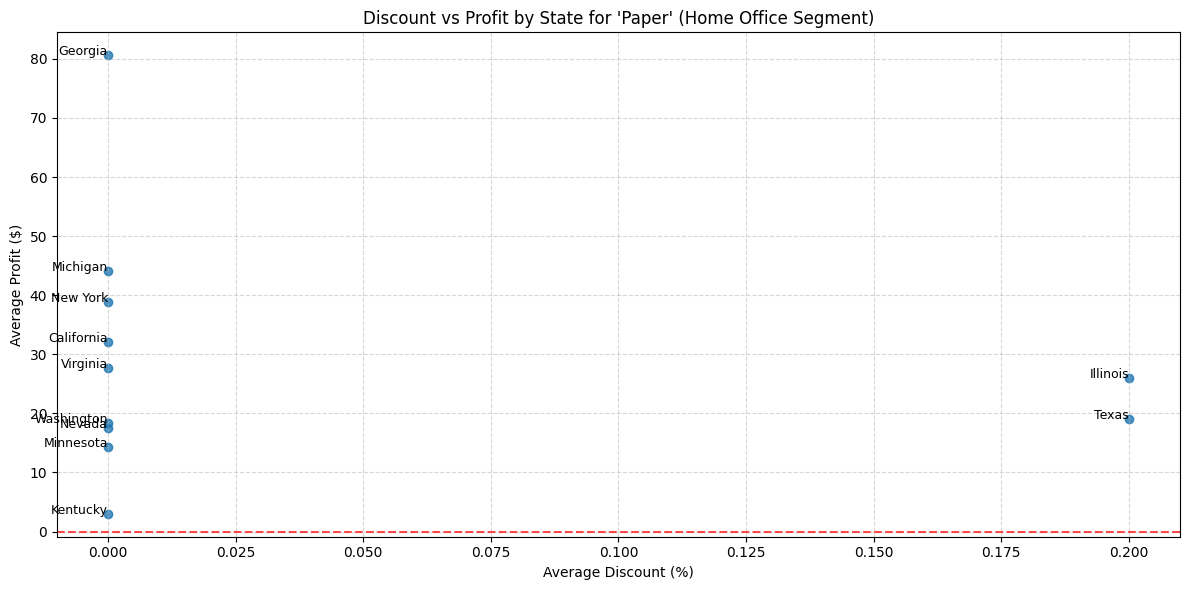

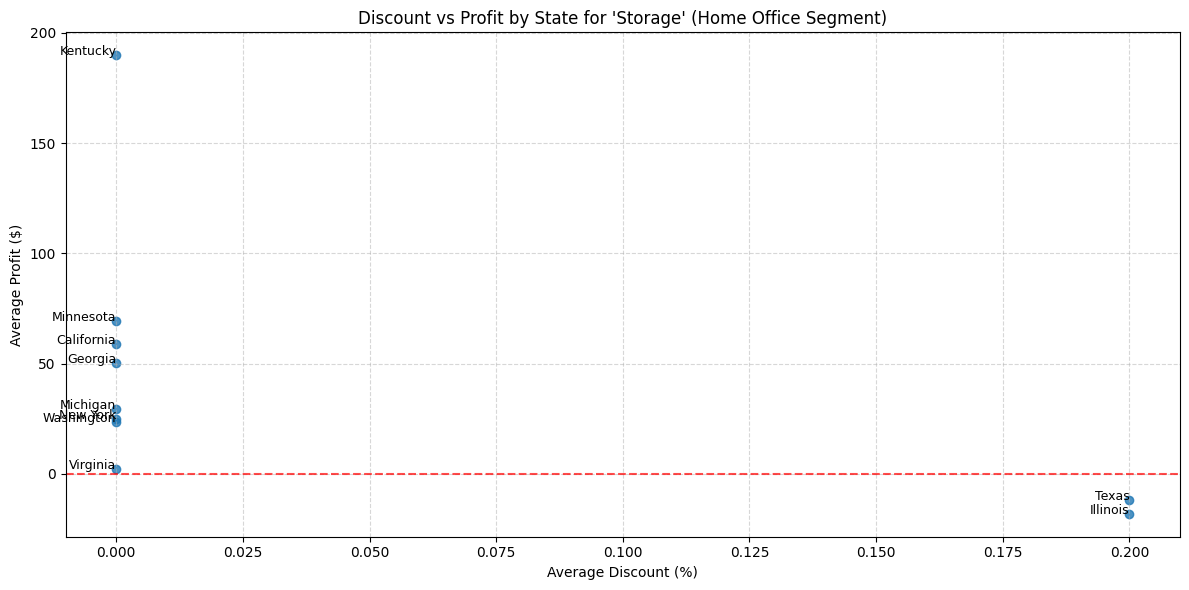

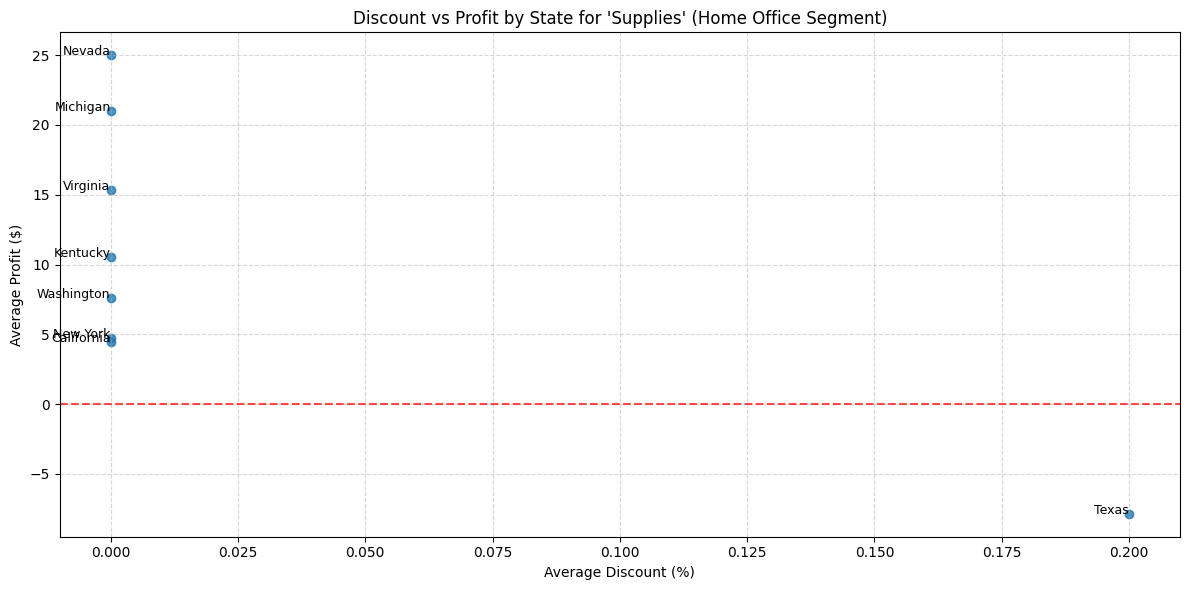

In [39]:
# Let's compare that to the profit making states

selected_states = [
    "California", "New York", "Washington", "Michigan", "Minnesota",
    "Georgia", "Virginia", "Inidiana", "Nevada", "Kentucky", "Texas", "Illinois"
]

# Filter for Home Office segment and selected states in the Office Supplies category
home_office_selected_states = df[
    (df["Category"] == "Office Supplies") &
    (df["Segment"] == "Home Office") &
    (df["State"].isin(selected_states))
]

# Group by Sub-Category and State, calculate mean Discount and Profit
home_office_subcat_summary = home_office_selected_states.groupby(
    ["Sub-Category", "State"]
)[["Discount", "Profit"]].mean().reset_index()

# Get unique sub-categories
subcategories = home_office_subcat_summary["Sub-Category"].unique()

# Create scatter plots for each sub-category
for sub_category in subcategories:
    subcat_data = home_office_subcat_summary[
        home_office_subcat_summary["Sub-Category"] == sub_category
    ]
    
    plt.figure(figsize=(12, 6))
    plt.scatter(subcat_data["Discount"], subcat_data["Profit"], alpha=0.8)
    
    # Annotate points with state names
    for i, row in subcat_data.iterrows():
        plt.text(row["Discount"], row["Profit"], row["State"], fontsize=9, ha='right')
    
    plt.xlabel("Average Discount (%)")
    plt.ylabel("Average Profit ($)")
    plt.title(f"Discount vs Profit by State for '{sub_category}' (Home Office Segment)")
    plt.axhline(0, color="red", linestyle="--", alpha=0.7)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
# That paints a much learer picture, all the profit making staetes have very low or no discount rates.
# However, Texas, the state with the highest losses in this category is still able to make profits on par or higher that other states with no discount rates at all in some sub categories.
# This tells us that the loss making states have a poor discount strategies in some sub categories, they are offering discounts that are too high and not seeing the returns on them. 
# The Appliances and Binders sub categories are the biggest culprits in this case with a 70 - 80% discount rate being the major cause of losses in this category as a whole.
# Supplies, Storage and Appliances need to have their discount rates re-evaluated as they are the only sub categories that are seeing losses at the 20% discount rate.

In [17]:
# Report on the Effect of Discount Rates on Profits

# 1. Overview:
# The analysis of the data reveals that discount rates have a significant impact on profits across various sub-categories and customer segments. 
# While some sub-categories remain profitable at higher discount rates, others experience losses even at moderate discount levels.

# 2. Key Observations:
# - Sub-Categories:
#   - "Supplies" and "Storage" are particularly sensitive to discounts, with losses observed at discount rates as low as 10-20%.
#   - "Appliances" and "Binders" show significant losses at very high discount rates (70-80%), indicating poor discounting strategies.
#   - Sub-categories like "Paper" and "Labels" remain profitable even at moderate discount rates.

# - Customer Segments:
#   - The "Consumer" segment is the most affected by discounts, with "Supplies" showing losses at a 10% discount rate.
#   - The "Home Office" segment is generally profitable, except for "Supplies" and "Storage" at higher discount rates.
#   - The "Corporate" segment shows resilience, with most sub-categories remaining profitable even at moderate discount rates.

# - States:
#   - Loss-making states like Texas and Illinois offer excessively high discounts (70-80%), leading to significant losses.
#   - Profit-making states generally maintain low or no discount rates, ensuring profitability across sub-categories.

# 3. Recommendations:
# - Re-evaluate discount strategies for sensitive sub-categories like "Supplies," "Storage," and "Appliances."
# - Limit discounts to 20% or lower for sub-categories that show losses at higher rates.
# - Focus on optimizing discount strategies in loss-making states to align with the practices of profit-making states.
# - Conduct further analysis to identify the optimal discount rate for each sub-category and segment to maximize profitability.

# 4. Conclusion:
# The data highlights the importance of a targeted discount strategy to ensure profitability. By addressing the sub-categories and states with poor discounting practices, the overall performance of the Office Supplies category can be significantly improved.